<a href="https://colab.research.google.com/github/SapirGabay/ML_Project/blob/main/ML_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import requests



# CSV
url_csv = "https://raw.githubusercontent.com/SapirGabay/ML_Project_Part1/main/sentiment.csv"
df = pd.read_csv(url_csv)

# Positive words
url_pos = "https://raw.githubusercontent.com/SapirGabay/ML_Project_Part1/main/positive-words.txt"
positive_words = set([
    line.strip() for line in requests.get(url_pos).text.splitlines()
    if line.strip() and not line.startswith(';')
])

# Negative words
url_neg = "https://raw.githubusercontent.com/SapirGabay/ML_Project_Part1/main/negative-words.txt"
negative_words = set([
    line.strip() for line in requests.get(url_neg).text.splitlines()
    if line.strip() and not line.startswith(';')
])

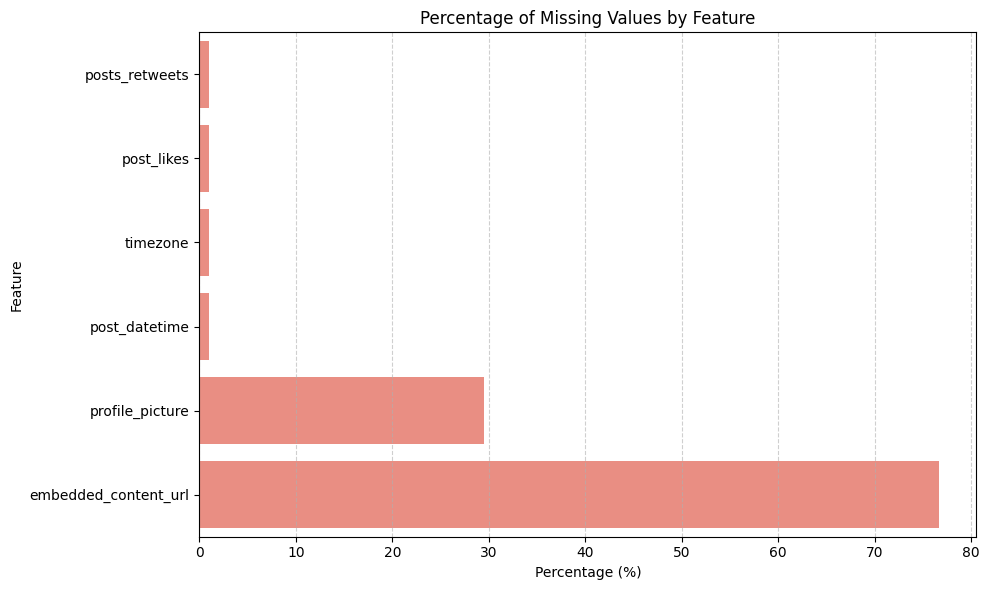

sentiment
negative    56.458763
positive    43.541237
Name: proportion, dtype: float64


In [ ]:
# Pre-processing Stage
# Missing Values Handling

df_missing = df.replace('?', pd.NA)
df_clean = df_missing.dropna(subset=['sentiment']).copy()
df_clean = df_clean[df_clean.isnull().sum(axis=1) <= 3].copy()
df_clean.to_csv('sentiment_cleaned.csv', index=False)

missing_percentage = df_clean.isnull().mean() * 100
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_percentage.values, y=missing_percentage.index, color='salmon')
plt.title('Percentage of Missing Values by Feature')
plt.xlabel('Percentage (%)')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


numeric_cols = df_clean.select_dtypes(include='number').columns
for col in numeric_cols:
    if df_clean[col].isnull().sum() > 0:
        median_val = df_clean[col].median()
        df_clean[col] = df_clean[col].fillna(median_val)

categorical_cols = ['type', 'checkmark', 'timezone']

for col in categorical_cols:
    if df_clean[col].isnull().sum() > 0:
        mode_val = df_clean[col].mode()[0]
        df_clean[col] = df_clean[col].fillna(mode_val)


print(df_clean['sentiment'].value_counts(normalize=True) * 100)


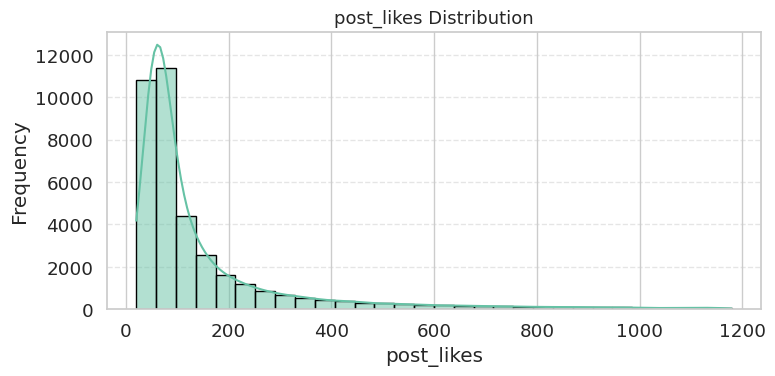

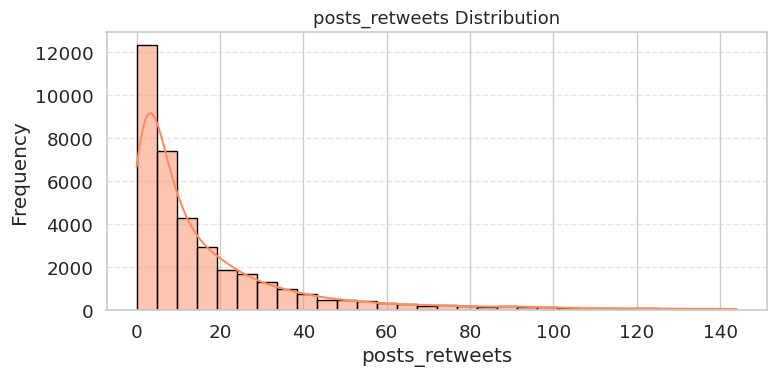

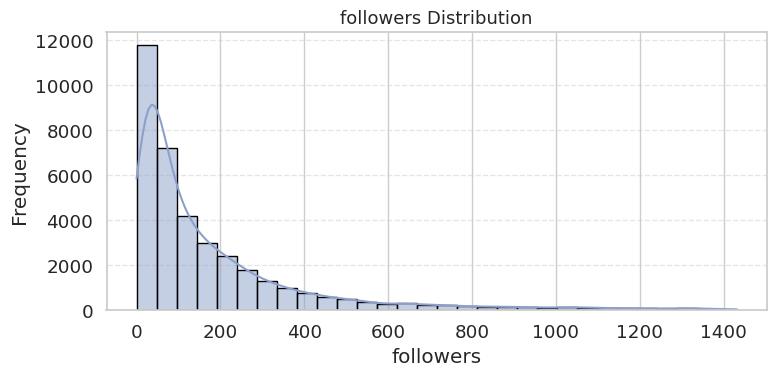

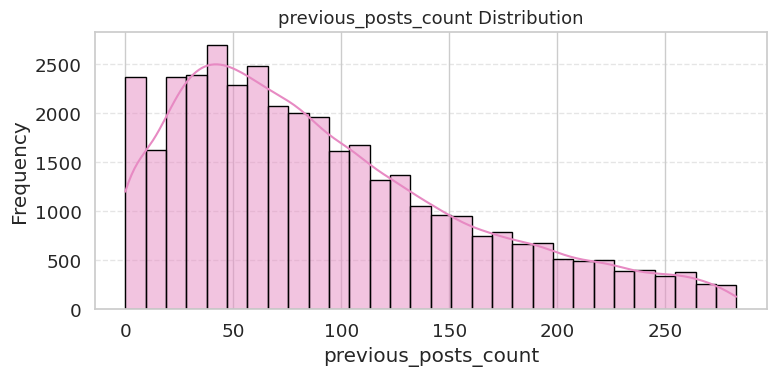

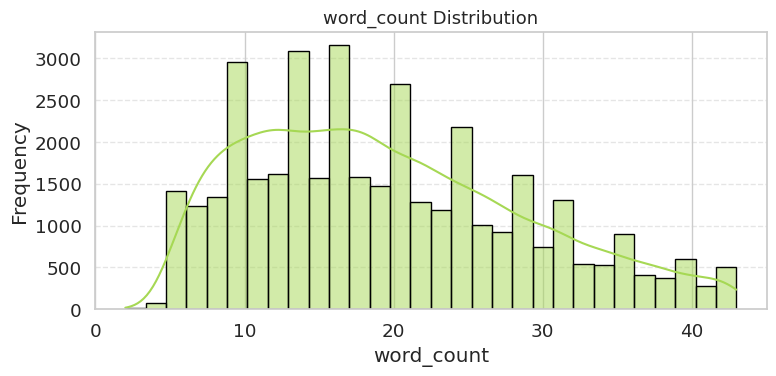

In [ ]:
sns.set(style="whitegrid", font_scale=1.2)
numeric_cols = ['post_likes', 'posts_retweets', 'followers', 'previous_posts_count']
df[numeric_cols] = df[numeric_cols].replace('?', np.nan)
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

def plot_hist_trimmed(col, color):
    upper = df[col].quantile(0.95)  # חיתוך ב-95%
    plt.figure(figsize=(8, 4))
    sns.histplot(df[df[col] <= upper][col], bins=30, kde=True, color=color, edgecolor='black')
    plt.title(f'{col} Distribution', fontsize=13)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

plot_hist_trimmed('post_likes', '#66c2a5')
plot_hist_trimmed('posts_retweets', '#fc8d62')
plot_hist_trimmed('followers', '#8da0cb')
plot_hist_trimmed('previous_posts_count', '#e78ac3')
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
plot_hist_trimmed('word_count', '#a6d854')


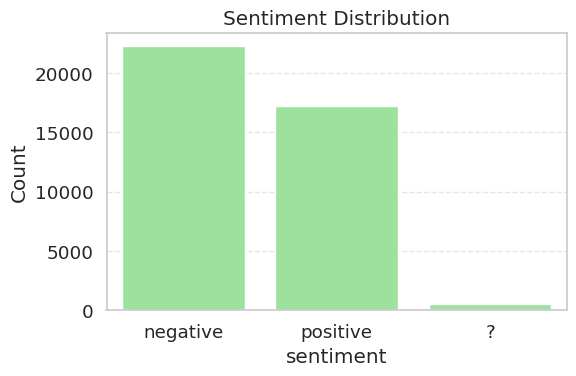

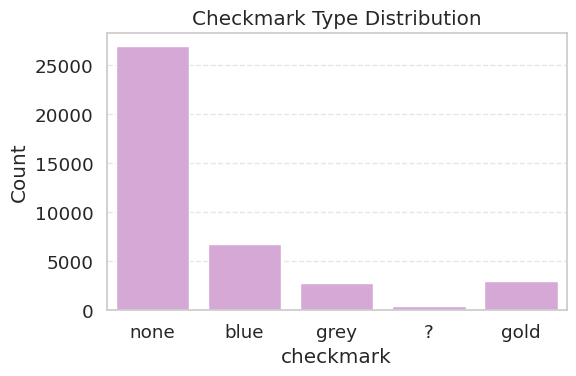

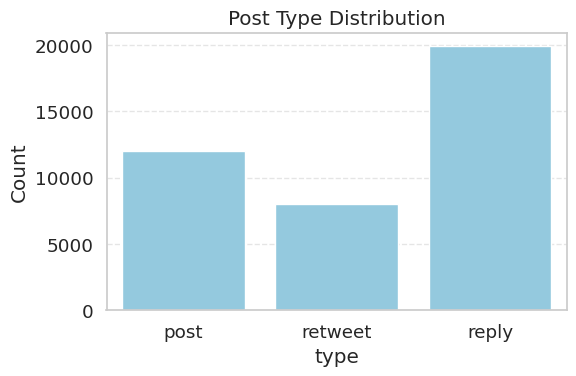

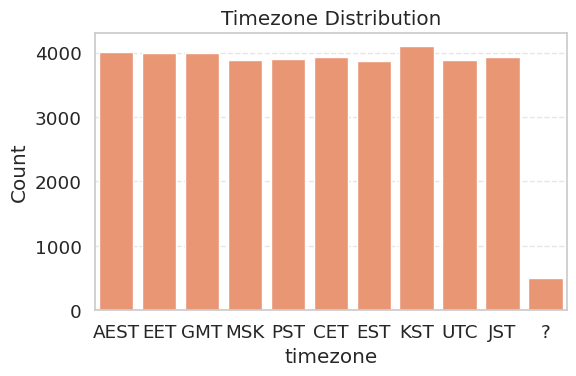

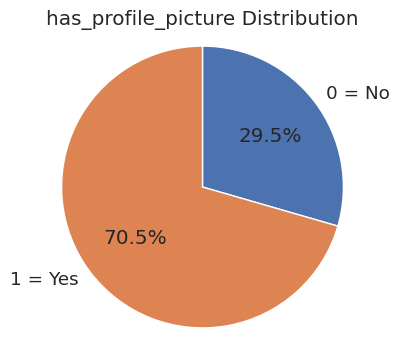

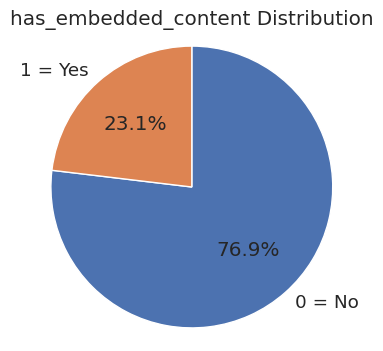

In [ ]:
def plot_count(col, title, color):
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df, color=color)
    plt.title(title)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
plot_count('sentiment', 'Sentiment Distribution', '#90EE90')
plot_count('checkmark', 'Checkmark Type Distribution', '#DDA0DD')
plot_count('type', 'Post Type Distribution', '#87CEEB')
plot_count('timezone', 'Timezone Distribution', '#fc8d62')

df['has_profile_picture'] = df['profile_picture'].notna().astype(int)

df['has_embedded_content'] = df['embedded_content_url'].notna().astype(int)

binary_vars = ['has_profile_picture', 'has_embedded_content']

for var in binary_vars:
    counts = df[var].value_counts().sort_index()
    labels = ['0 = No', '1 = Yes']

    plt.figure(figsize=(4, 4))
    plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, counterclock=False)
    plt.title(f'{var} Distribution')
    plt.axis('equal')
    plt.show()

<ipython-input-6-16844a1e1223>:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[year_col] = pd.to_datetime(df[date_column], errors='coerce').dt.year


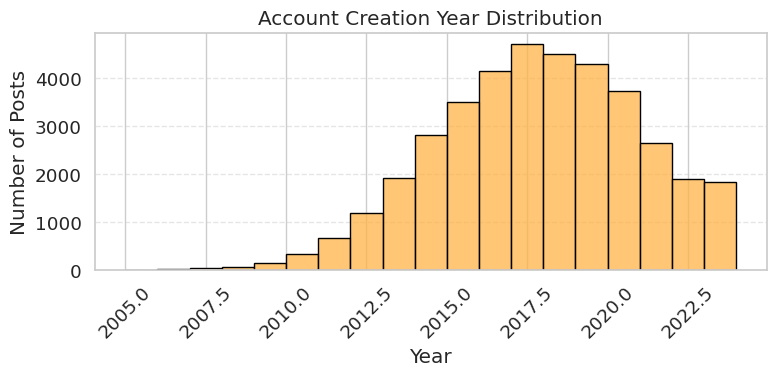

<ipython-input-6-16844a1e1223>:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[year_col] = pd.to_datetime(df[date_column], errors='coerce').dt.year


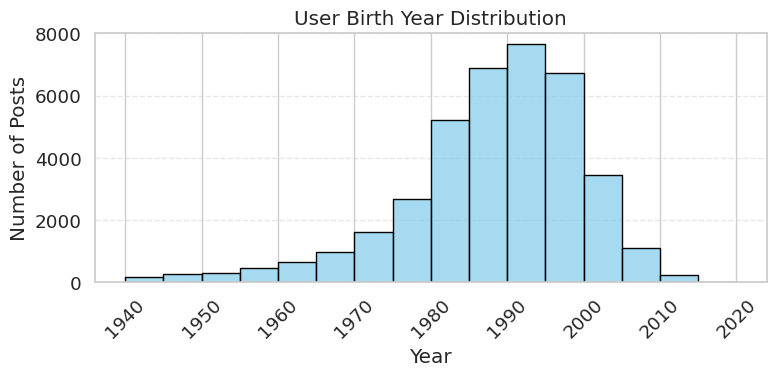

<ipython-input-6-16844a1e1223>:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[year_col] = pd.to_datetime(df[date_column], errors='coerce').dt.year


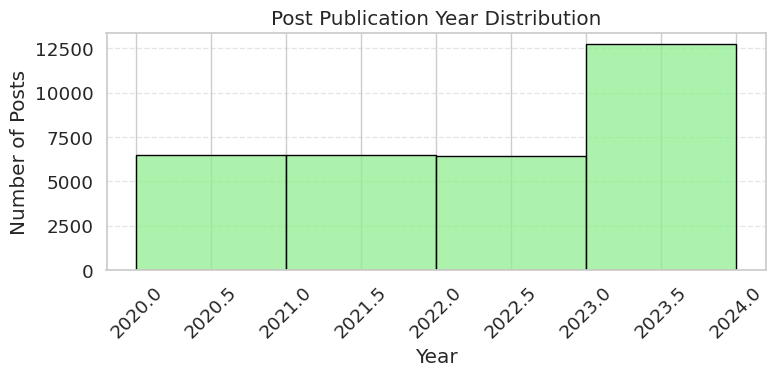

In [ ]:
def plot_year_distribution(df, date_column, title, color, bins_range):
    year_col = f"{date_column}_year"
    df[year_col] = pd.to_datetime(df[date_column], errors='coerce').dt.year
    plt.figure(figsize=(8, 4))
    sns.histplot(df[year_col].dropna(), bins=bins_range, color=color, edgecolor='black')
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Number of Posts')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

plot_year_distribution(df_clean, 'account_creation_date', 'Account Creation Year Distribution', '#FFB347', range(2005, 2025))
plot_year_distribution(df_clean, 'birthday', 'User Birth Year Distribution', '#87CEEB', range(1940, 2025, 5))
plot_year_distribution(df_clean, 'post_datetime', 'Post Publication Year Distribution', '#90EE90', range(2020, 2025))


<ipython-input-7-bd36272edbe8>:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['post_datetime'] = pd.to_datetime(df['post_datetime'], errors='coerce')


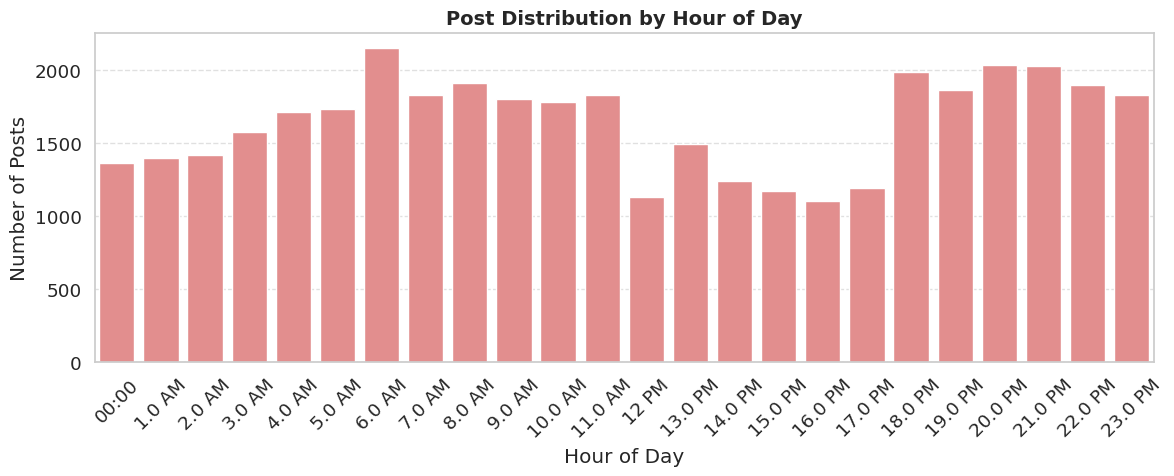

In [ ]:
# Convert datetime and extract hour
df['post_datetime'] = pd.to_datetime(df['post_datetime'], errors='coerce')
df['post_hour'] = df['post_datetime'].dt.hour

# Count posts for each hour (0 to 23)
hourly_counts = df['post_hour'].value_counts().sort_index()

# Format hours to readable AM/PM format
def format_hour(hour):
    if hour == 0:
        return '00:00'
    elif hour < 12:
        return f'{hour} AM'
    elif hour == 12:
        return '12 PM'
    else:
        return f'{hour} PM'

# Create formatted x-axis labels
hour_labels = [format_hour(h) for h in hourly_counts.index]

# Plot
plt.figure(figsize=(12, 5))
sns.barplot(x=hour_labels, y=hourly_counts.values, color='lightcoral')
plt.title('Post Distribution by Hour of Day', fontsize=14, weight='bold')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

<ipython-input-8-8bee33b313e5>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_percentages.index, y=day_percentages.values, palette='pastel')


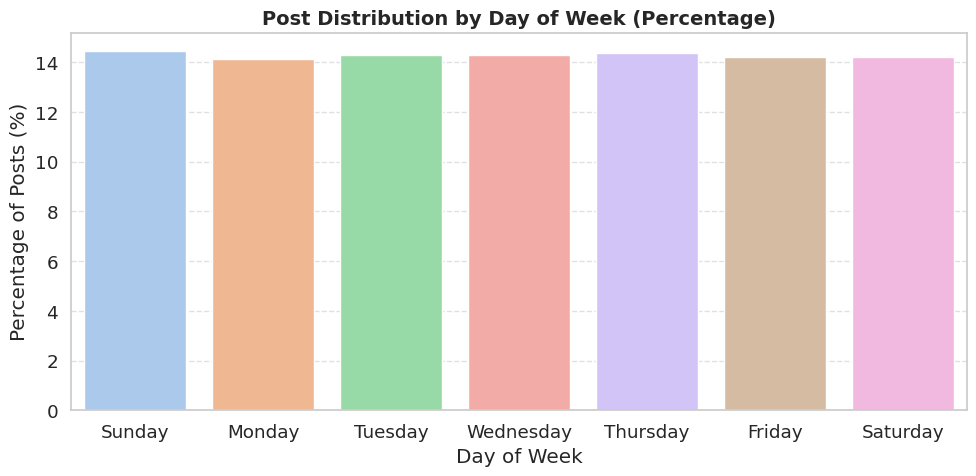

In [ ]:

# Ensure datetime is parsed and extract day name
df['post_datetime'] = pd.to_datetime(df['post_datetime'], errors='coerce')
df['post_day'] = df['post_datetime'].dt.day_name()

# Define the order of days
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Calculate post counts and convert to percentages
day_counts = df['post_day'].value_counts().reindex(day_order)
day_percentages = (day_counts / day_counts.sum()) * 100

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=day_percentages.index, y=day_percentages.values, palette='pastel')
plt.title('Post Distribution by Day of Week (Percentage)', fontsize=14, weight='bold')
plt.xlabel('Day of Week')
plt.ylabel('Percentage of Posts (%)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


<ipython-input-9-7cf50707ea53>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='word_count', data=df, palette='Set3')


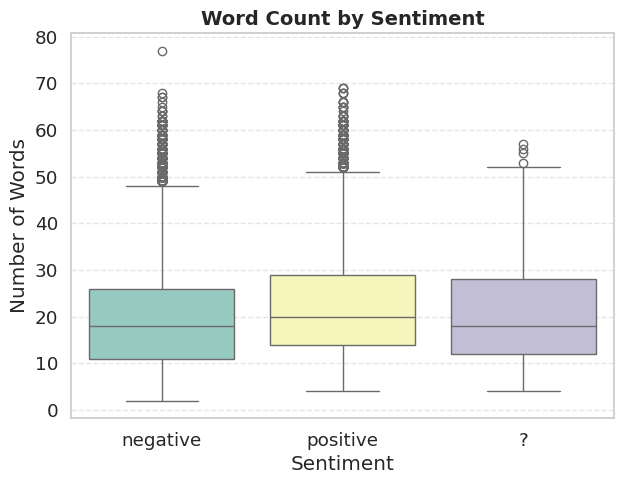

In [ ]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='sentiment', y='word_count', data=df, palette='Set3')
plt.title('Word Count by Sentiment', fontsize=14, weight='bold')
plt.xlabel('Sentiment')
plt.ylabel('Number of Words')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


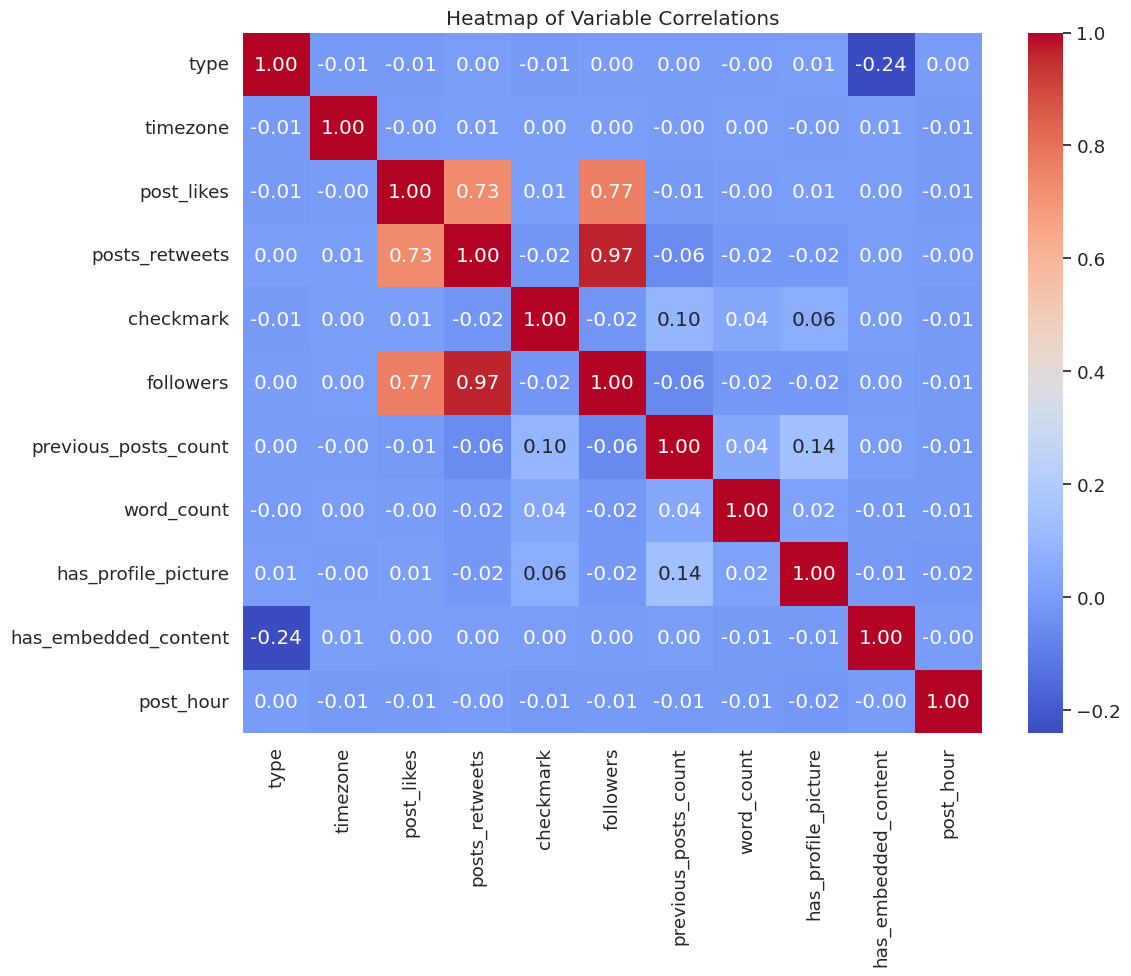

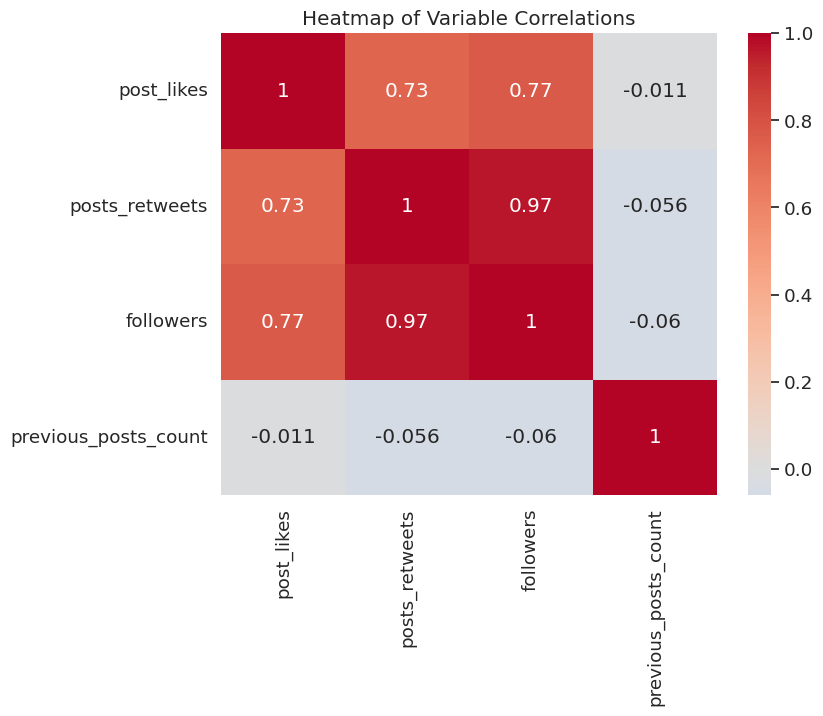

In [ ]:
# Generate and visualize correlation heatmaps for selected numeric features

categorical_to_convert = ['timezone', 'checkmark', 'type']
for col in categorical_to_convert:
    df[col] = pd.factorize(df[col])[0]

numeric_data = df.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Heatmap of Variable Correlations")
plt.tight_layout()
plt.show()

cols_to_convert = ['post_likes', 'posts_retweets', 'followers', 'previous_posts_count']
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

numeric_df = df[cols_to_convert]
corr = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of Variable Correlations')
plt.show()

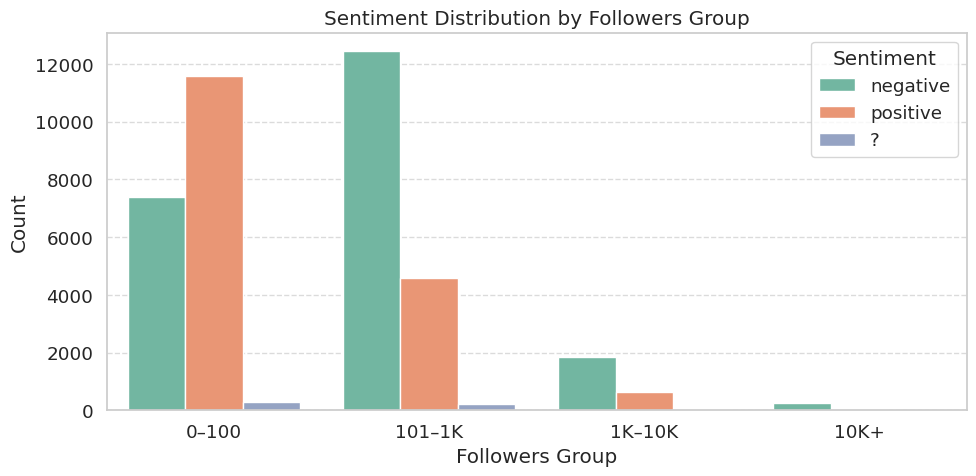

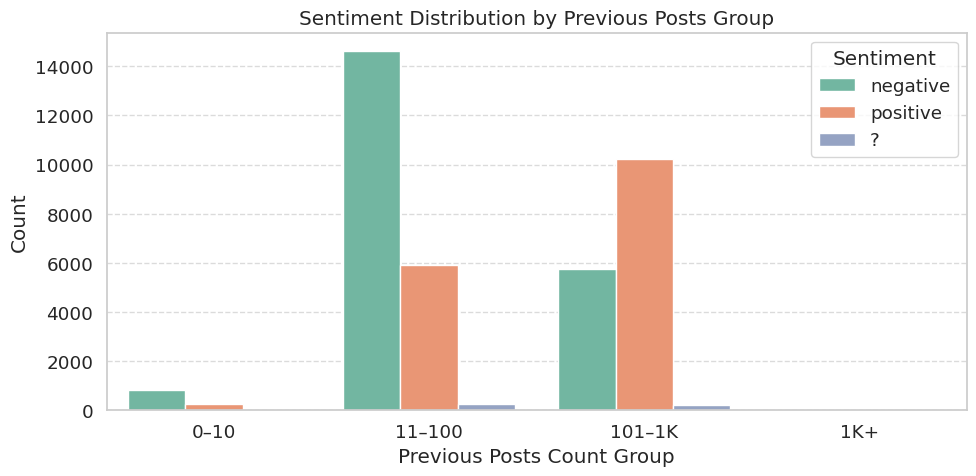

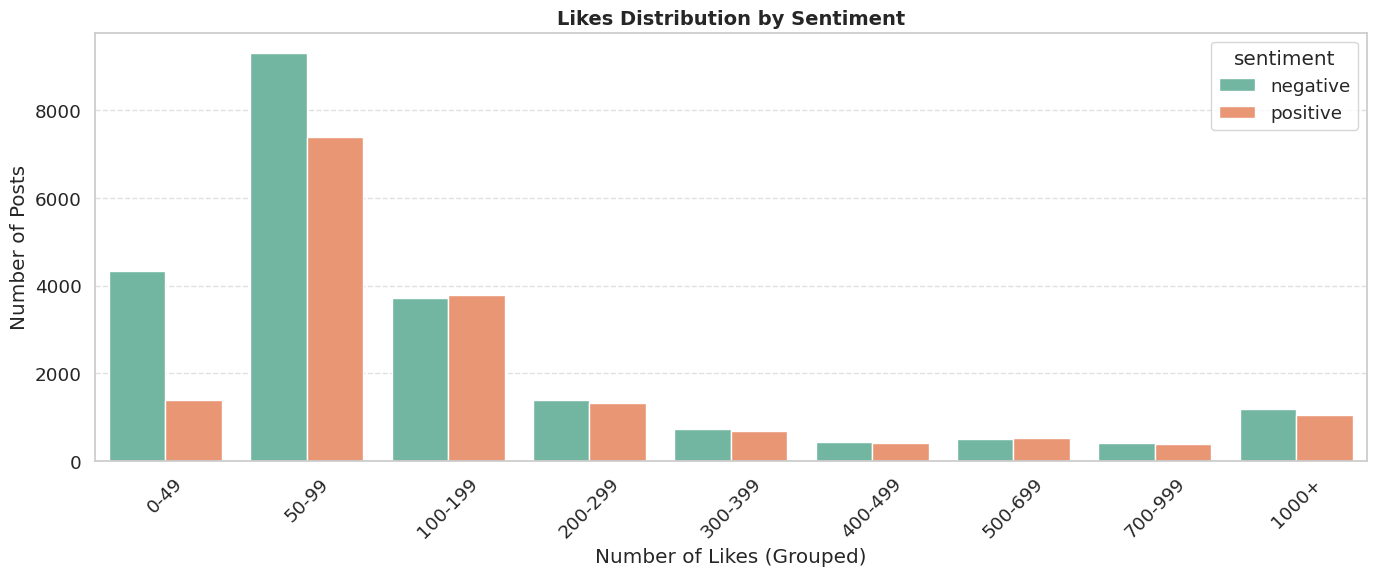

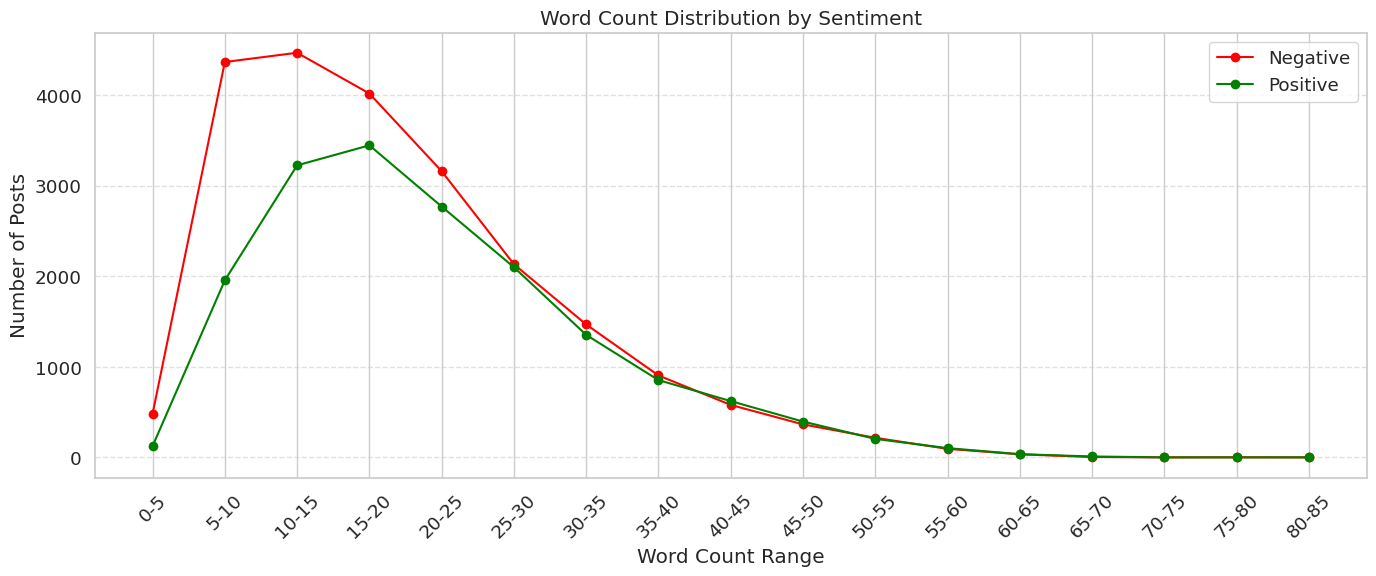

<ipython-input-11-b1112c2a1a29>:53: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['birthday'] = pd.to_datetime(df['birthday'], errors='coerce')


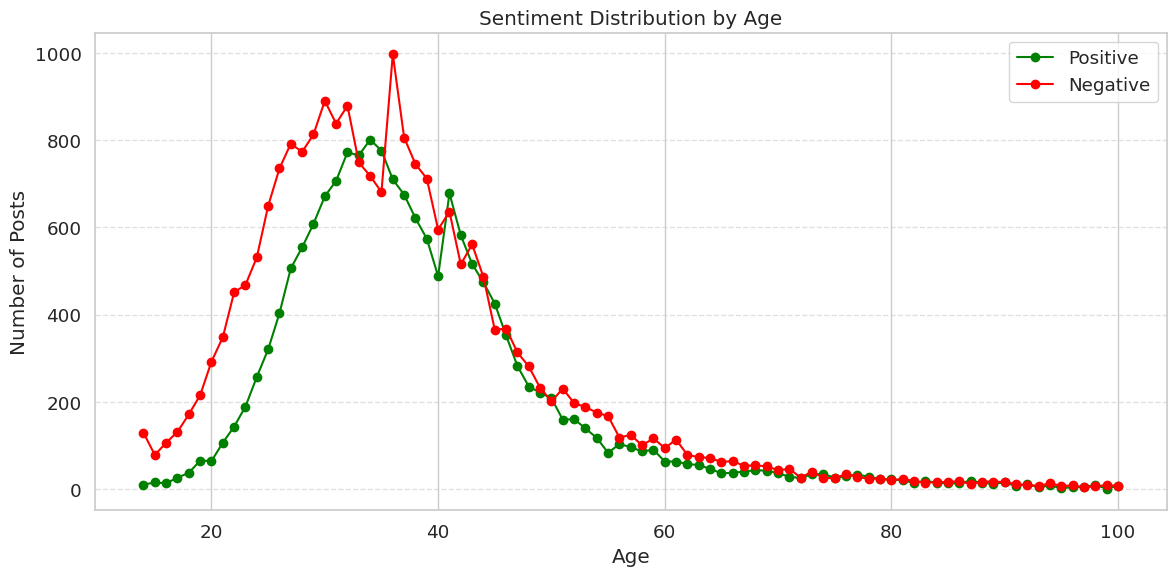

In [ ]:

def prepare_bins_and_plot(df, column, bins, labels, hue='sentiment', title='', xlabel='', ylabel='Number of Posts', palette='Set2', rotate_xticks=True):
    df = df.copy()
    df[column] = pd.to_numeric(df[column], errors='coerce')
    df = df[df[hue].isin(['positive', 'negative'])]
    df = df.dropna(subset=[column])
    df[f'{column}_binned'] = pd.cut(df[column], bins=bins, labels=labels, include_lowest=True)

    plt.figure(figsize=(14, 6))
    sns.countplot(data=df, x=f'{column}_binned', hue=hue, palette=palette)
    plt.title(title, fontsize=14, weight='bold')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if rotate_xticks:
        plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

def plot_grouped_sentiment(df, group_column, title, xlabel):
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=group_column, hue='sentiment', palette='Set2')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Count')
    plt.legend(title='Sentiment')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

def plot_sentiment_by_word_count(df):
    df = df.copy()
    df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
    bins = list(range(0, 90, 5))
    labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]
    df['word_count_bin'] = pd.cut(df['word_count'], bins=bins, labels=labels, include_lowest=True)
    word_count_dist = df.groupby(['word_count_bin', 'sentiment'], observed=False).size().unstack().fillna(0)


    plt.figure(figsize=(14, 6))
    plt.plot(word_count_dist.index, word_count_dist['negative'], color='red', label='Negative', marker='o')
    plt.plot(word_count_dist.index, word_count_dist['positive'], color='green', label='Positive', marker='o')
    plt.title('Word Count Distribution by Sentiment')
    plt.xlabel('Word Count Range')
    plt.ylabel('Number of Posts')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_sentiment_by_age(df):
    df = df.copy()
    df['birthday'] = pd.to_datetime(df['birthday'], errors='coerce')
    df['age'] = pd.to_datetime('today').year - df['birthday'].dt.year
    df = df[df['age'].between(10, 100)]
    df = df[df['sentiment'].isin(['positive', 'negative'])]
    age_sentiment_counts = df.groupby(['age', 'sentiment']).size().unstack(fill_value=0)

    plt.figure(figsize=(12, 6))
    plt.plot(age_sentiment_counts.index, age_sentiment_counts['positive'], color='green', marker='o', label='Positive')
    plt.plot(age_sentiment_counts.index, age_sentiment_counts['negative'], color='red', marker='o', label='Negative')
    plt.title('Sentiment Distribution by Age')
    plt.xlabel('Age')
    plt.ylabel('Number of Posts')
    plt.legend()
    plt.grid(True, axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Group followers and previous_posts_count into categories
df['followers_group'] = pd.cut(df['followers'], bins=[0, 100, 1000, 10000, float('inf')], labels=['0–100', '101–1K', '1K–10K', '10K+'])
df['posts_group'] = pd.cut(df['previous_posts_count'], bins=[0, 10, 100, 1000, float('inf')], labels=['0–10', '11–100', '101–1K', '1K+'])

plot_grouped_sentiment(df, 'followers_group', 'Sentiment Distribution by Followers Group', 'Followers Group')
plot_grouped_sentiment(df, 'posts_group', 'Sentiment Distribution by Previous Posts Group', 'Previous Posts Count Group')

prepare_bins_and_plot(
    df=df,
    column='post_likes',
    bins=[0, 50, 100, 200, 300, 400, 500, 700, 1000, float('inf')],
    labels=['0-49', '50-99', '100-199', '200-299', '300-399', '400-499', '500-699', '700-999', '1000+'],
    title='Likes Distribution by Sentiment',
    xlabel='Number of Likes (Grouped)'
)

plot_sentiment_by_word_count(df)
plot_sentiment_by_age(df)

<ipython-input-12-61846d4f00be>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_clean['birthday'] = pd.to_datetime(df_clean['birthday'], errors='coerce')
<ipython-input-12-61846d4f00be>:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_clean['account_creation_date'] = pd.to_datetime(df_clean['account_creation_date'], errors='coerce')
<ipython-input-12-61846d4f00be>:4: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_clean['post_datetime'] = pd.to_datetime(df_clean['post_datetime'], errors='coerce')


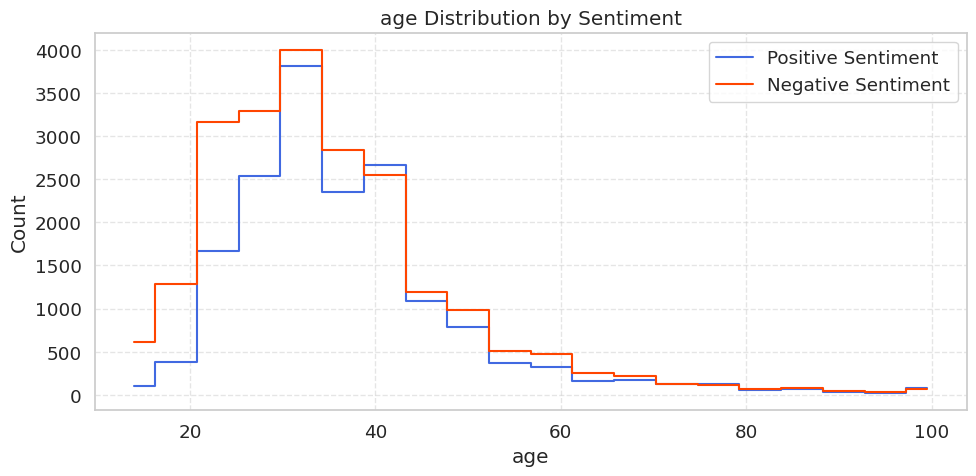

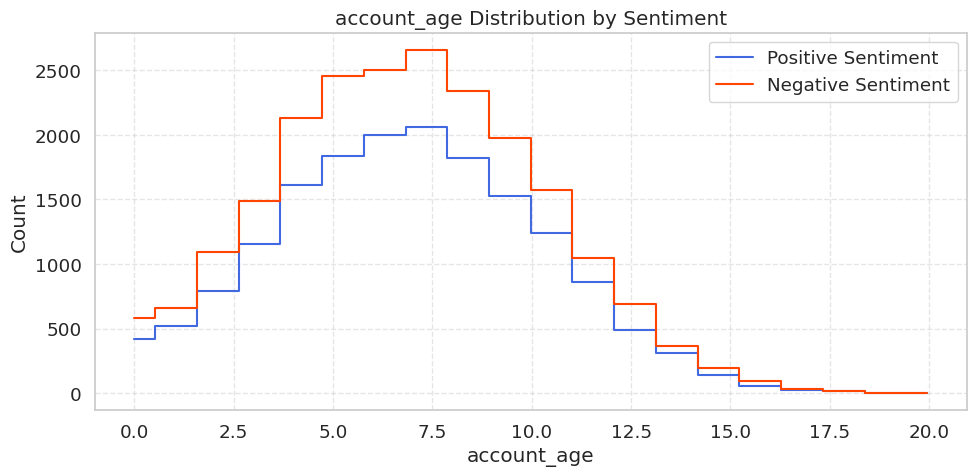

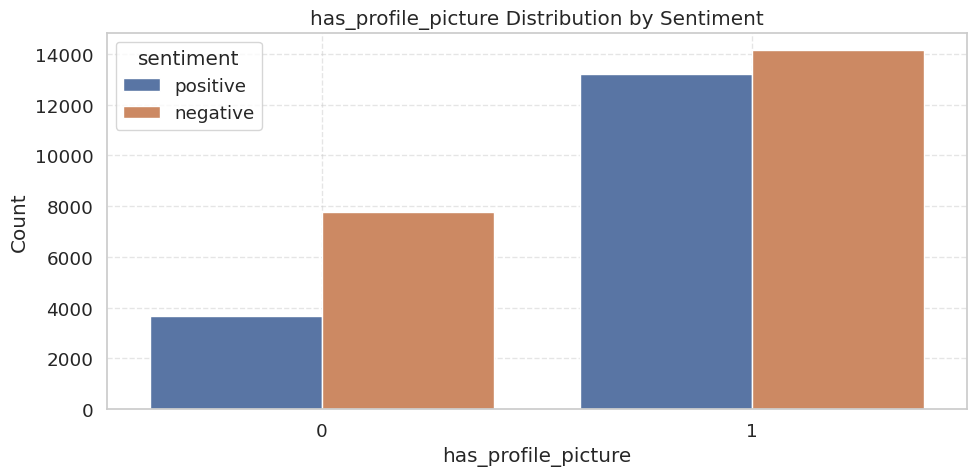

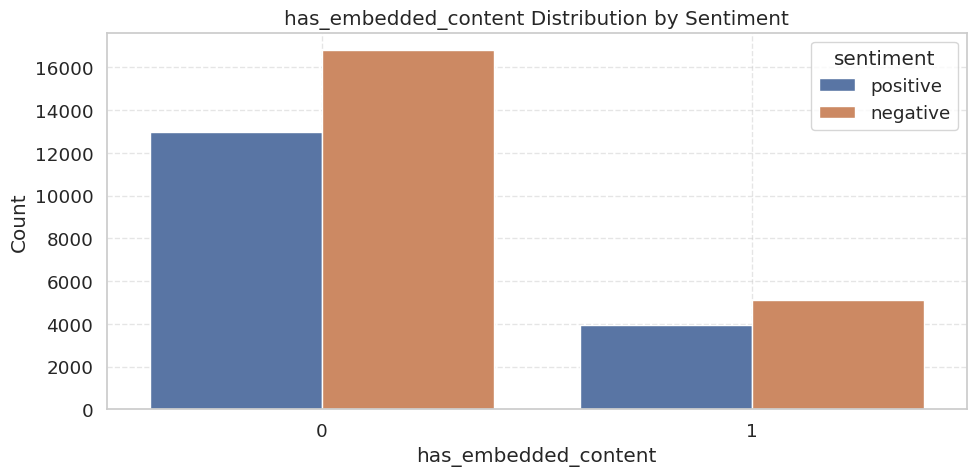

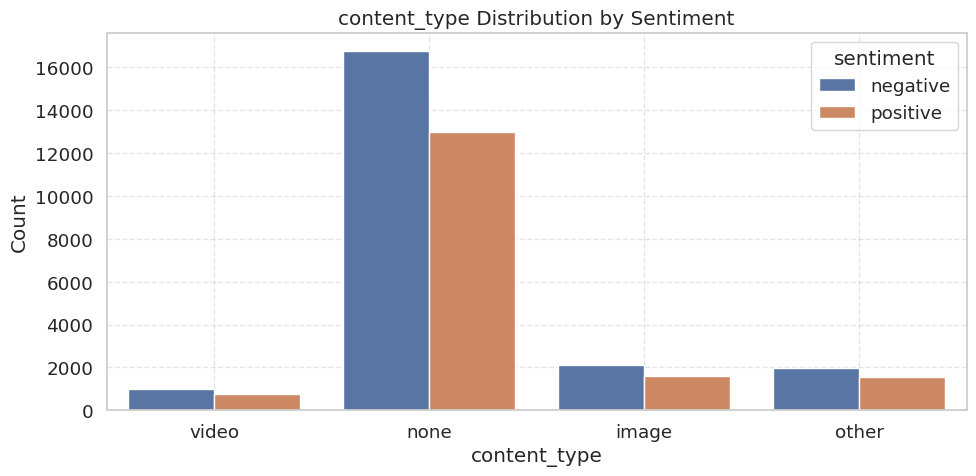

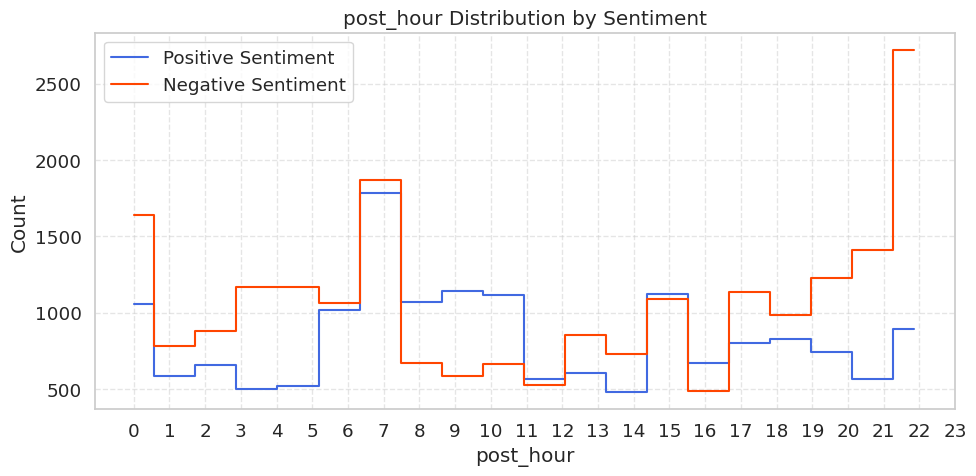

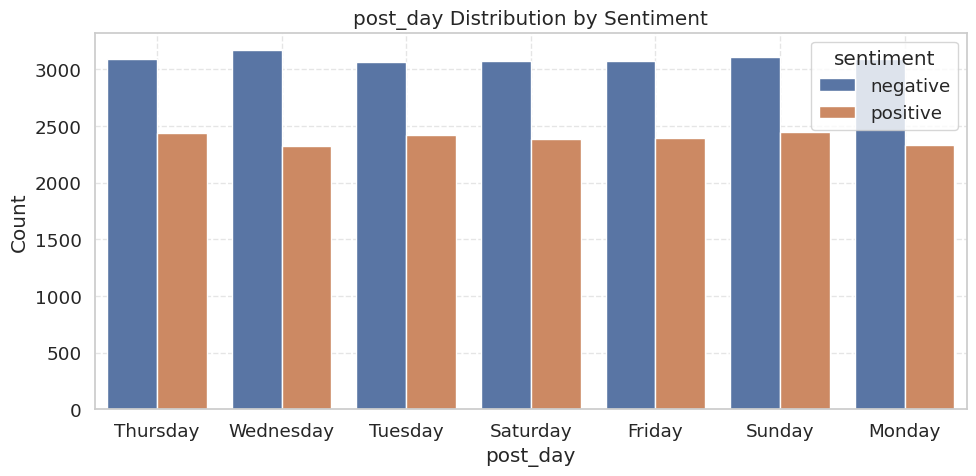

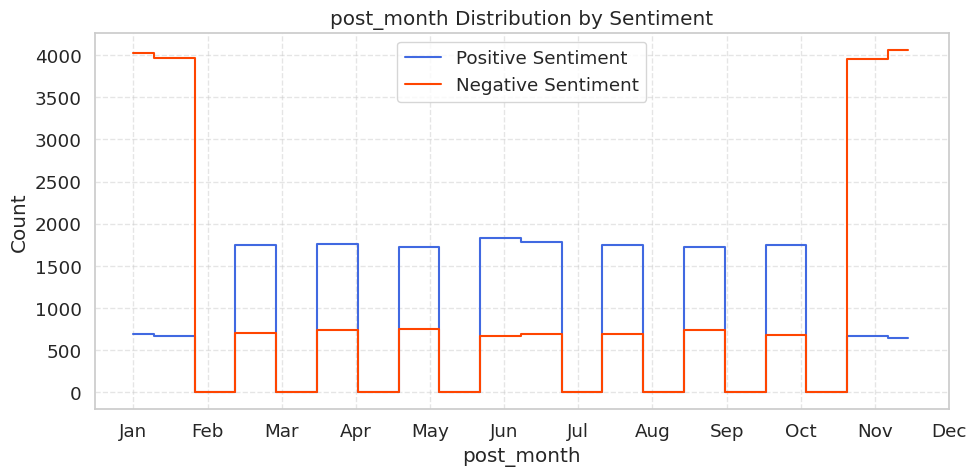

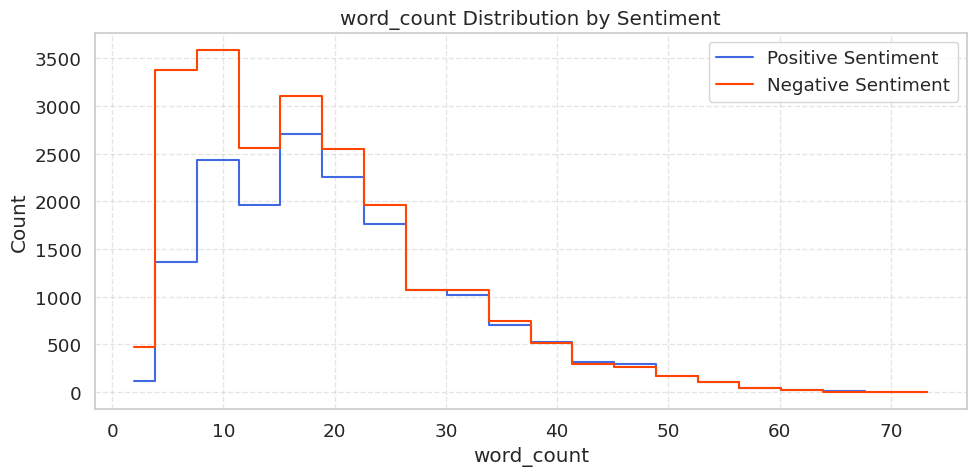

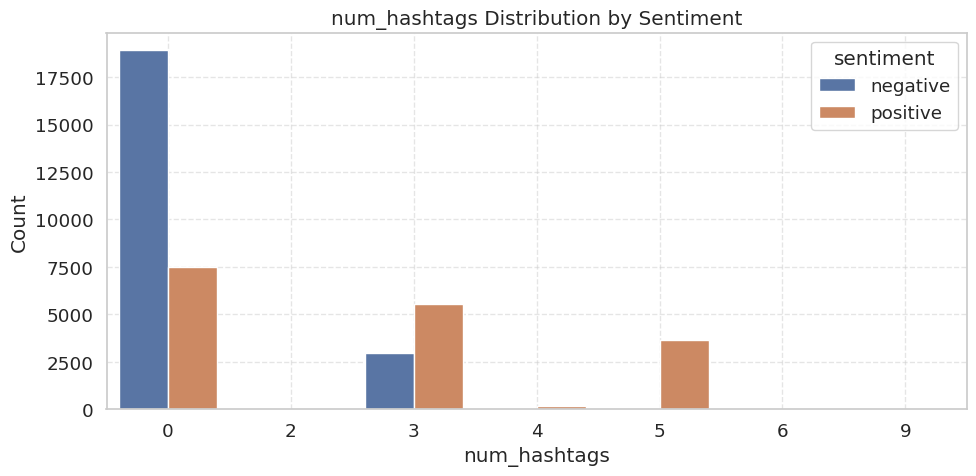

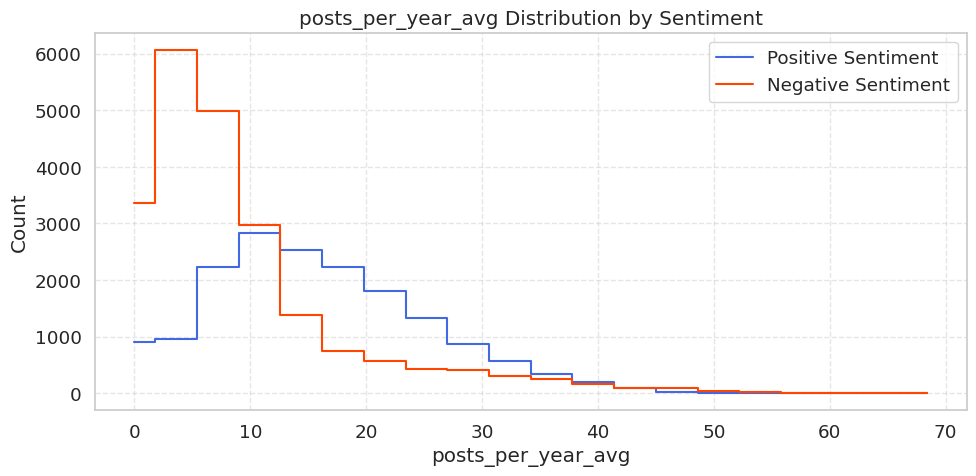

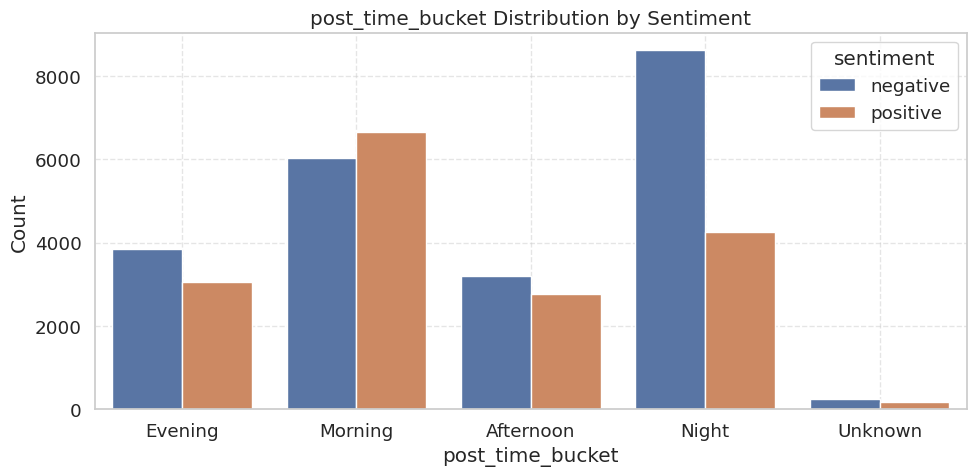

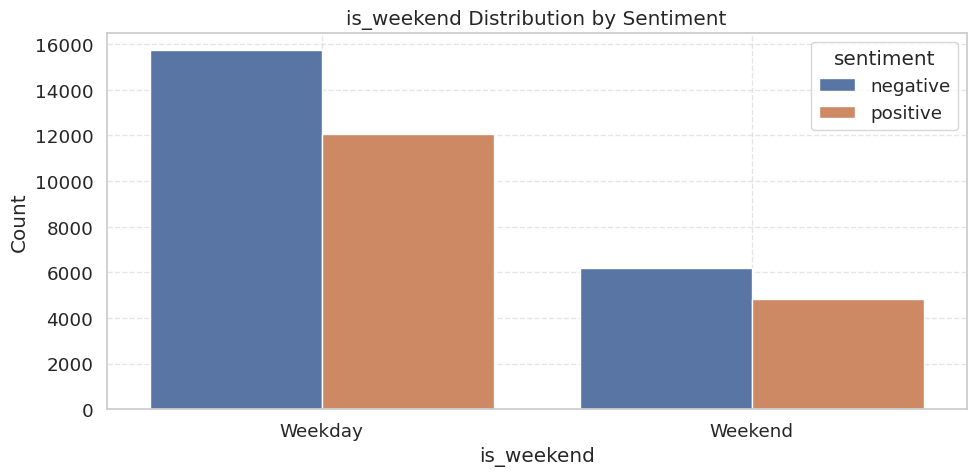

In [ ]:

# Clean datetime fields and calculate age-related features
df_clean['birthday'] = pd.to_datetime(df_clean['birthday'], errors='coerce')
df_clean['account_creation_date'] = pd.to_datetime(df_clean['account_creation_date'], errors='coerce')
df_clean['post_datetime'] = pd.to_datetime(df_clean['post_datetime'], errors='coerce')

df_clean['age'] = pd.to_datetime('today').year - df_clean['birthday'].dt.year
df_clean['account_age'] = pd.to_datetime('today').year - df_clean['account_creation_date'].dt.year

# Convert to numeric
cols_to_numeric = ['post_likes', 'followers', 'previous_posts_count', 'account_age', 'posts_retweets']
for col in cols_to_numeric:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# Binary features
df_clean['has_profile_picture'] = df_clean['profile_picture'].notna().astype(int)
df_clean['has_embedded_content'] = df_clean['embedded_content_url'].notna().astype(int)

# Content type classification
def detect_content_type(url):
    if pd.isna(url):
        return 'none'
    url = str(url).lower()
    if any(ext in url for ext in ['.jpg', '.jpeg', '.png', '.gif']):
        return 'image'
    elif any(ext in url for ext in ['.mp4', '.mov', '.avi']):
        return 'video'
    return 'other'

df_clean['content_type'] = df_clean['embedded_content_url'].apply(detect_content_type)

# Date/time derived features
df_clean['post_hour'] = df_clean['post_datetime'].dt.hour
df_clean['post_day'] = df_clean['post_datetime'].dt.day_name()
df_clean['post_month'] = df_clean['post_datetime'].dt.month
df_clean['is_weekend'] = df_clean['post_datetime'].dt.weekday >= 5
df_clean['is_weekend'] = df_clean['is_weekend'].map({True: 'Weekend', False: 'Weekday'})

def bucket_time(hour):
    if pd.isna(hour):
        return 'Unknown'
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    return 'Night'

df_clean['post_time_bucket'] = df_clean['post_hour'].apply(bucket_time)

# Text and engagement features
df_clean['word_count'] = df_clean['text'].apply(lambda x: len(str(x).split()))
df_clean['num_hashtags'] = df_clean['text'].apply(lambda x: str(x).count('#'))
df_clean['engagement_score'] = df_clean['post_likes'] + df_clean['posts_retweets']

df_clean['likes_per_follower'] = np.where(
    df_clean['followers'] > 0,
    df_clean['post_likes'] / df_clean['followers'],
    np.nan
)

df_clean['posts_per_year_avg'] = np.where(
    (df_clean['account_age'].isna()) | (df_clean['account_age'] == 0),
    df_clean['previous_posts_count'],
    df_clean['previous_posts_count'] / df_clean['account_age']
)
features = [
    'age', 'account_age', 'has_profile_picture', 'has_embedded_content',
    'content_type', 'post_hour', 'post_day', 'post_month', 'word_count',
    'num_hashtags', 'posts_per_year_avg', 'post_time_bucket', 'is_weekend'
]

for col in features:
    if col not in df_clean.columns:
        continue

    plt.figure(figsize=(10, 5))

    if df_clean[col].dtype == 'object' or df_clean[col].nunique() < 10:
        data = df_clean[[col, 'sentiment']].dropna()
        sns.countplot(data=data, x=col, hue='sentiment')
    else:
        pos = df_clean[df_clean['sentiment'] == 'positive'][col].dropna()
        neg = df_clean[df_clean['sentiment'] == 'negative'][col].dropna()
        bins = np.histogram_bin_edges(pd.concat([pos, neg]), bins=20)
        pos_counts, _ = np.histogram(pos, bins=bins)
        neg_counts, _ = np.histogram(neg, bins=bins)
        plt.step(bins[:-1], pos_counts, where='mid', label='Positive Sentiment', color='royalblue')
        plt.step(bins[:-1], neg_counts, where='mid', label='Negative Sentiment', color='orangered')
        plt.legend()

    plt.title(f'{col} Distribution by Sentiment')
    plt.xlabel(col)
    if col == 'post_hour':
        plt.xticks(ticks=range(0, 24))
    if col == 'post_month':
        plt.xticks(ticks=range(1, 13), labels=calendar.month_abbr[1:13])
    plt.ylabel('Count')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

In [ ]:
# likes_per_follower – if followers == 0 or NaN → 0
df_clean['followers'] = pd.to_numeric(df_clean['followers'], errors='coerce')
df_clean['post_likes'] = pd.to_numeric(df_clean['post_likes'], errors='coerce')
df_clean['likes_per_follower'] = np.where(
    df_clean['followers'] > 0,
    df_clean['post_likes'] / df_clean['followers'],
    np.nan
)

# posts_per_year_avg – if account_age == 0 or NaN → previous_posts_count as-is
df_clean['previous_posts_count'] = pd.to_numeric(df_clean['previous_posts_count'], errors='coerce')
df_clean['account_age'] = pd.to_numeric(df_clean['account_age'], errors='coerce')
df_clean['posts_per_year_avg'] = np.where(
    (df_clean['account_age'].isna()) | (df_clean['account_age'] == 0),
    df_clean['previous_posts_count'],
    df_clean['previous_posts_count'] / df_clean['account_age']
)




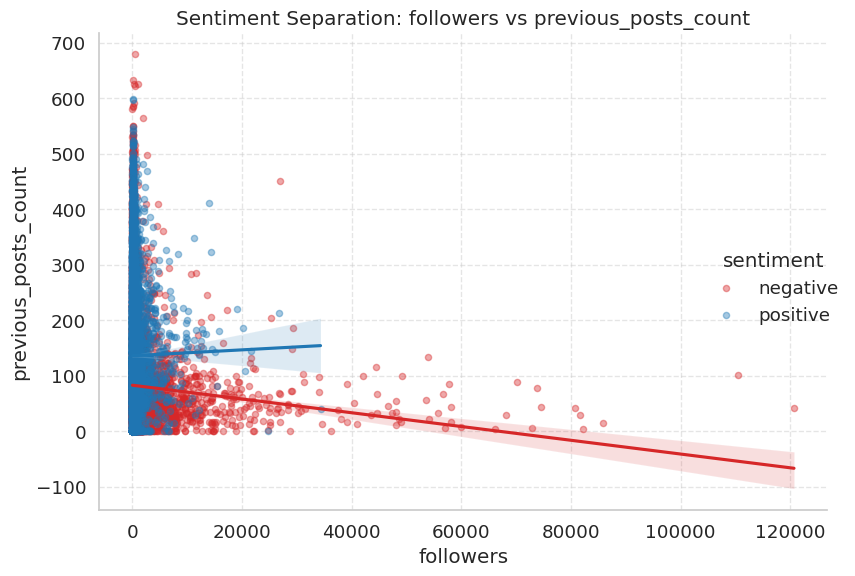

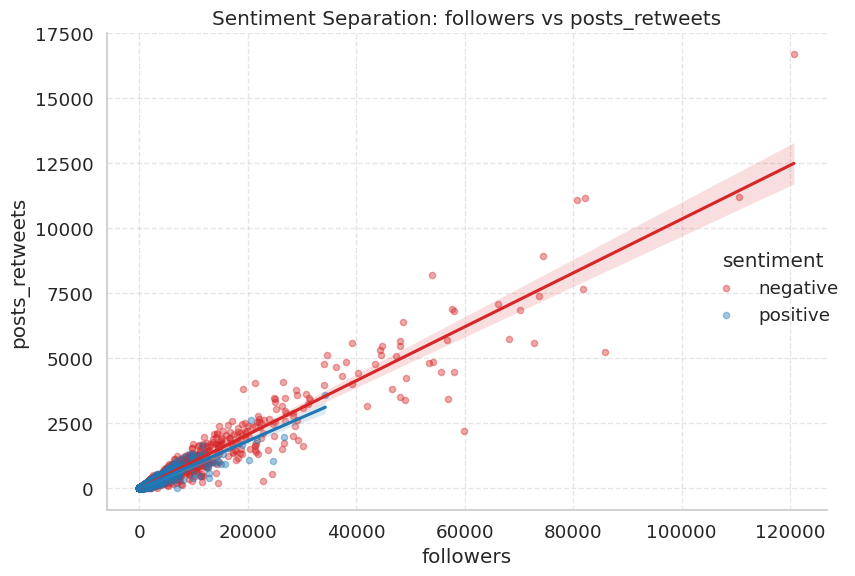

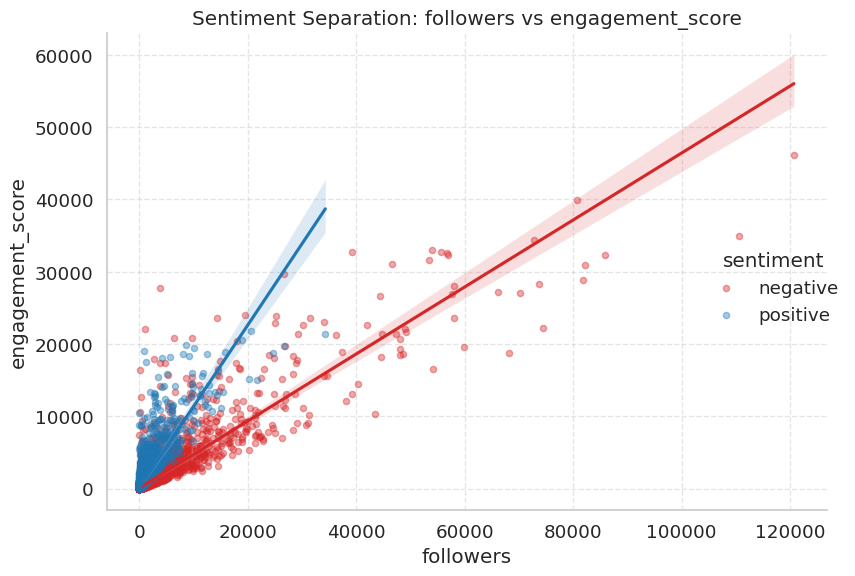

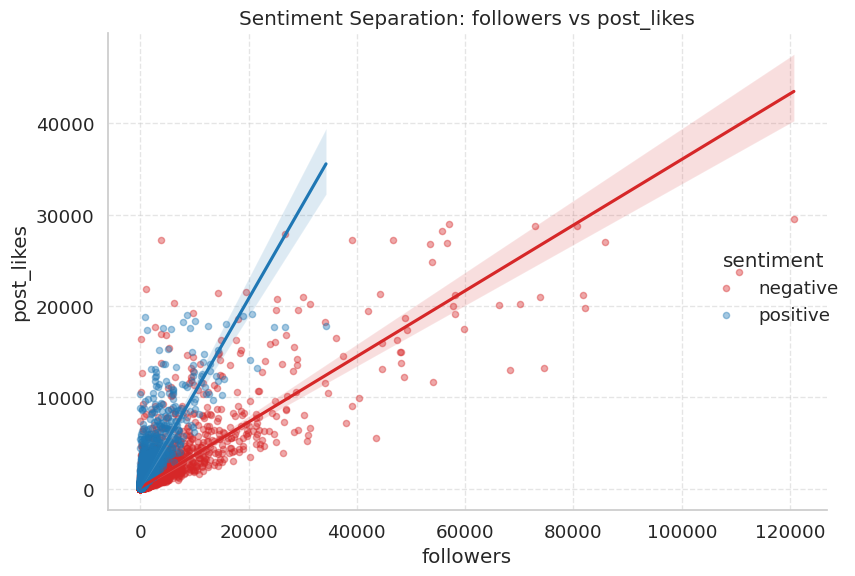

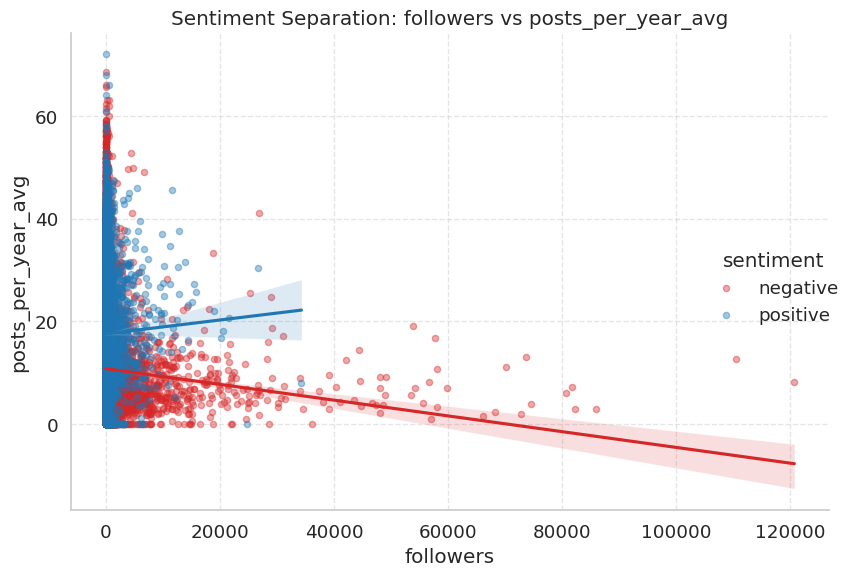

In [ ]:
feature_pairs = [
    ('followers', 'previous_posts_count'),
    ('followers', 'posts_retweets'),
    ('followers', 'engagement_score'),
    ('followers', 'post_likes'),
    ('followers', 'posts_per_year_avg')
]

def plot_scatter_with_regression(df, x, y):
    subset = df[[x, y, 'sentiment']].dropna()


    sns.lmplot(data=subset, x=x, y=y, hue='sentiment',
               palette={'positive': '#1f77b4', 'negative': '#d62728'},
               scatter_kws={'alpha': 0.4, 's': 20},
               height=6, aspect=1.2)
    plt.title(f'Sentiment Separation: {x} vs {y}')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


for x, y in feature_pairs:
    plot_scatter_with_regression(df_clean, x, y)

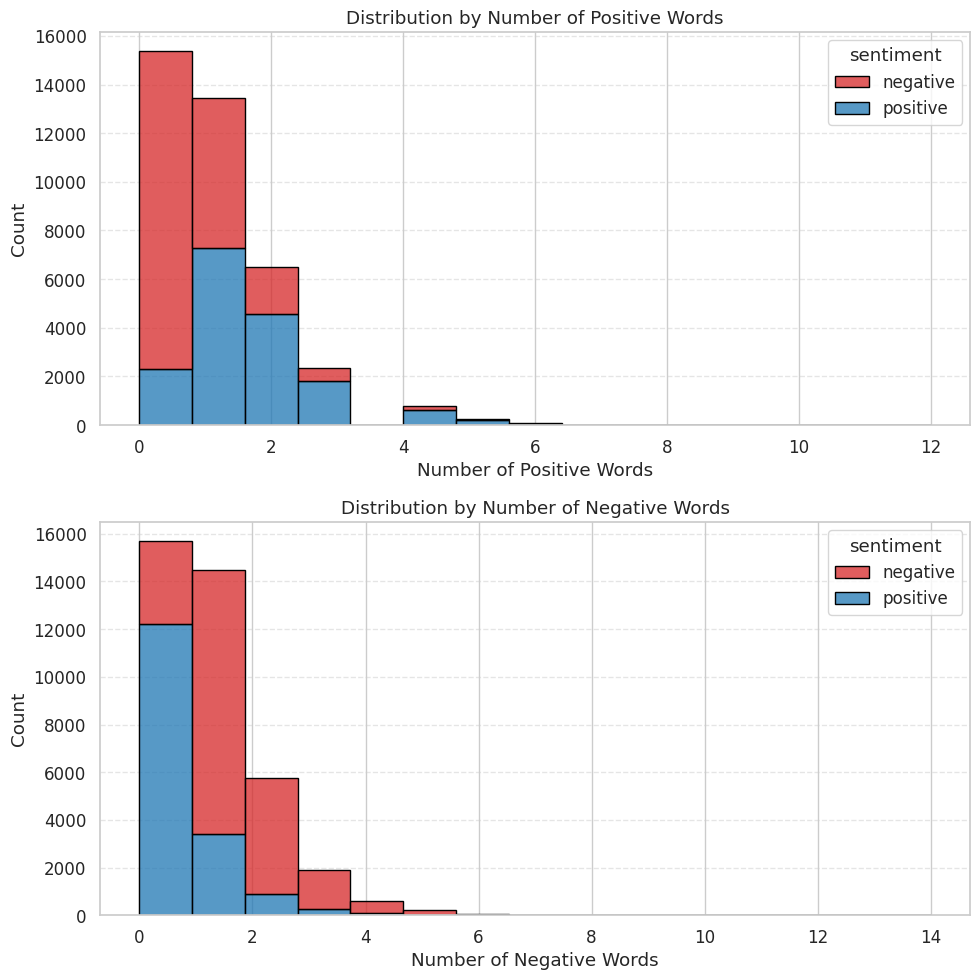

In [ ]:
def count_sentiment_words(text, word_set):
    words = str(text).lower().split()
    return sum(word in word_set for word in words)

df_clean['positive_word_count'] = df_clean['text'].apply(lambda x: count_sentiment_words(x, positive_words))
df_clean['negative_word_count'] = df_clean['text'].apply(lambda x: count_sentiment_words(x, negative_words))

sns.set(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(10, 10))


plt.subplot(2, 1, 1)
sns.histplot(
    data=df_clean,
    x='positive_word_count',
    hue='sentiment',
    bins=15,
    multiple='stack',
    palette={'positive': '#1f77b4', 'negative': '#d62728'},
    edgecolor='black'
)
plt.title('Distribution by Number of Positive Words')
plt.xlabel('Number of Positive Words')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.subplot(2, 1, 2)
sns.histplot(
    data=df_clean,
    x='negative_word_count',
    hue='sentiment',
    bins=15,
    multiple='stack',
    palette={'positive': '#1f77b4', 'negative': '#d62728'},
    edgecolor='black'
)
plt.title('Distribution by Number of Negative Words')
plt.xlabel('Number of Negative Words')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


In [ ]:
# is_daytime_post: 1 if post published between 5:00 and 17:00
df_clean['is_daytime_post'] = df_clean['post_hour'].apply(lambda x: 1 if 5 <= x < 17 else 0)

# is_post_in_positive_season: 1 if month is Feb–Oct, else 0
df_clean['is_post_in_positive_season'] = df_clean['post_month'].apply(lambda x: 1 if 2 <= x <= 10 else 0)

# is_short_post: 1 if word_count < 20
df_clean['is_short_post'] = df_clean['word_count'].apply(lambda x: 1 if x < 20 else 0)

# is_high_post_frequency: 1 if posts_per_year_avg > 10
df_clean['is_high_post_frequency'] = df_clean['posts_per_year_avg'].apply(lambda x: 1 if x > 10 else 0)

# has_multiple_hashtags: 1 if num_hashtags >= 3
df_clean['has_multiple_hashtags'] = df_clean['num_hashtags'].apply(lambda x: 1 if x >= 3 else 0)

# is_younger_user: 1 if age < 30
df_clean['is_younger_user'] = df_clean['age'].apply(lambda x: 1 if x < 30 else 0)


In [ ]:
df_selected = df_clean.copy()

cols_to_drop = [
    'id', 'text', 'post_datetime', 'embedded_content_url', 'username',
    'account_creation_date', 'email', 'birthday', 'profile_picture',
    'birthday_year', 'account_creation_date_year'
]
df_selected = df_selected.drop(columns=cols_to_drop)


from sklearn.preprocessing import MinMaxScaler

numeric_features = [
    'post_likes', 'posts_retweets', 'followers', 'previous_posts_count',
     'age', 'word_count',
    'engagement_score', 'posts_per_year_avg',
    'positive_word_count', 'negative_word_count'
]


existing_numeric = [col for col in numeric_features if col in df_selected.columns]


scaler = MinMaxScaler()
df_selected[existing_numeric] = scaler.fit_transform(df_selected[existing_numeric])



In [ ]:
likes_bins = [0, 10, 100, 500, 1000, np.inf]
likes_labels = ['likes_0_10', 'likes_11_100', 'likes_101_500', 'likes_501_1000', 'likes_1000_plus']
likes_dummies = pd.get_dummies(pd.cut(df_selected['post_likes'], bins=likes_bins, labels=likes_labels)).astype(int)

follower_bins = [0, 100, 500, 1000, 5000, np.inf]
follower_labels = ['f_0_100', 'f_101_500', 'f_501_1k', 'f_1k_5k', 'f_5k_plus']
follower_dummies = pd.get_dummies(pd.cut(df_selected['followers'], bins=follower_bins, labels=follower_labels)).astype(int)

word_bins = [0, 10, 20, 40, np.inf]
word_labels = ['words_0_10', 'words_11_20', 'words_21_40', 'words_41_plus']
word_dummies = pd.get_dummies(pd.cut(df_selected['word_count'], bins=word_bins, labels=word_labels)).astype(int)

hashtag_bins = [0, 1, 2, 3, np.inf]
hashtag_labels = ['hashtags_0', 'hashtags_1', 'hashtags_2', 'hashtags_3_plus']
hashtag_dummies = pd.get_dummies(pd.cut(df_selected['num_hashtags'], bins=hashtag_bins, labels=hashtag_labels)).astype(int)

age_bins = [0, 20, 30, 40, 50, 60, np.inf]
age_labels = ['age_<20', 'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60+']
age_dummies = pd.get_dummies(pd.cut(df_selected['age'], bins=age_bins, labels=age_labels)).astype(int)


acc_bins = [0, 1, 3, 5, 10, np.inf]
acc_labels = ['acc_<1y', 'acc_1-3y', 'acc_3-5y', 'acc_5-10y', 'acc_10y+']
account_dummies = pd.get_dummies(pd.cut(df_selected['account_age'], bins=acc_bins, labels=acc_labels)).astype(int)

time_bucket_dummies = pd.get_dummies(df_selected['post_time_bucket'], prefix='time_bucket').astype(int)
weekend_dummies = pd.get_dummies(df_selected['is_weekend'], prefix='weekend').astype(int)

type_dummies = pd.get_dummies(df_selected['type'], prefix='type').astype(int)
checkmark_dummies = pd.get_dummies(df_selected['checkmark'], prefix='checkmark').astype(int)
content_type_dummies = pd.get_dummies(df_selected['content_type'], prefix='content').astype(int)


def month_to_season(month):
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    elif month in [9, 10, 11]:
        return 'fall'
    else:
        return 'unknown'

df_selected['season'] = df_selected['post_month'].apply(month_to_season)
season_dummies = pd.get_dummies(df_selected['season'], prefix='season').astype(int)


df_selected = pd.concat([
    df_selected,
    likes_dummies,
    follower_dummies,
    word_dummies,
    hashtag_dummies,
    age_dummies,
    account_dummies,
    time_bucket_dummies,
    weekend_dummies,
    type_dummies,
    checkmark_dummies,
    content_type_dummies,
    season_dummies

], axis=1)

bool_cols = df_selected.select_dtypes(include='bool').columns
df_selected[bool_cols] = df_selected[bool_cols].astype(int)



In [ ]:
non_numeric_cols = df_selected.select_dtypes(exclude=['number']).columns
cols_to_drop = [col for col in non_numeric_cols if col != 'sentiment']

df_selected = df_selected.drop(columns=cols_to_drop)

# Fisher Score calculation
def fisher_score(df, feature_col, label_col='sentiment'):
    pos_vals = df.loc[df[label_col] == 'positive', feature_col].dropna()
    neg_vals = df.loc[df[label_col] == 'negative', feature_col].dropna()
    if pos_vals.empty or neg_vals.empty:
        return 0
    mean_pos, mean_neg = pos_vals.mean(), neg_vals.mean()
    std_pos, std_neg = pos_vals.std(ddof=1), neg_vals.std(ddof=1)
    return abs(mean_pos - mean_neg) / (std_pos + std_neg) if (std_pos + std_neg) else 0

# Calculate and print scores
numeric_features = df_selected.select_dtypes(include='number').columns
fisher_scores = {col: fisher_score(df_selected, col) for col in numeric_features}
fisher_scores_sorted = dict(sorted(fisher_scores.items(), key=lambda x: x[1], reverse=True))

for feature, score in fisher_scores_sorted.items():
    print(f"{feature}: {score:.4f}")

num_hashtags: 0.5523
negative_word_count: 0.5433
season_winter: 0.5261
is_post_in_positive_season: 0.5207
positive_word_count: 0.4978
has_multiple_hashtags: 0.4966
hashtags_3_plus: 0.4852
is_high_post_frequency: 0.4587
posts_per_year_avg: 0.3724
previous_posts_count: 0.3241
season_summer: 0.2953
season_spring: 0.2755
hashtags_2: 0.2379
checkmark_gold: 0.2295
checkmark_grey: 0.2295
checkmark_none: 0.1977
has_profile_picture: 0.1533
time_bucket_Night: 0.1527
likes_per_follower: 0.1394
is_daytime_post: 0.1379
time_bucket_Morning: 0.1267
is_younger_user: 0.1253
word_count: 0.1134
followers: 0.1081
posts_retweets: 0.1051
is_short_post: 0.0953
age: 0.0760
checkmark_blue: 0.0614
post_hour: 0.0609
age_<20: 0.0519
f_0_100: 0.0345
likes_0_10: 0.0275
time_bucket_Afternoon: 0.0251
engagement_score: 0.0117
acc_<1y: 0.0115
type_post: 0.0112
type_retweet: 0.0105
words_0_10: 0.0096
hashtags_1: 0.0093
post_datetime_year: 0.0071
time_bucket_Evening: 0.0066
content_image: 0.0065
account_age: 0.0064
post_

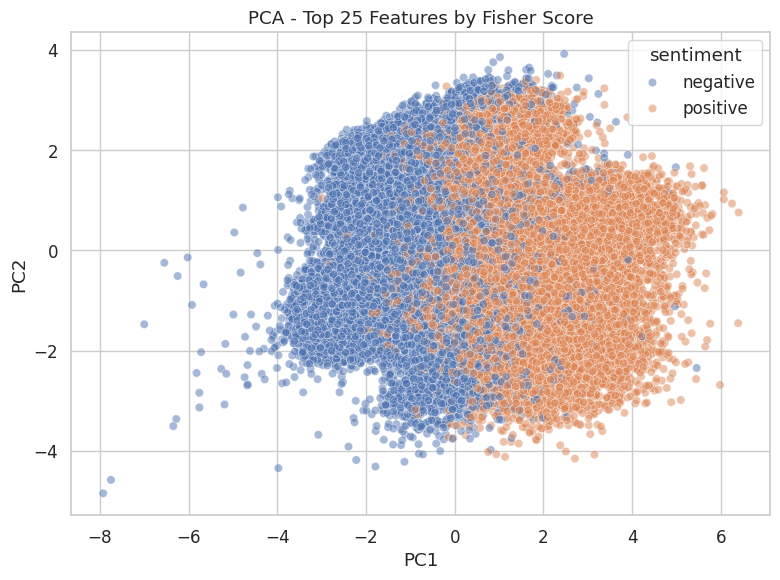

In [ ]:

# Select top 30 features
top_30_features = list(fisher_scores_sorted.keys())[:30]

# Prepare data
df_top30 = df_selected[top_30_features + ['sentiment']].dropna()
X = df_top30.drop(columns=['sentiment'])
y = df_top30['sentiment']

# Standardize and PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['sentiment'] = y.values

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='sentiment', alpha=0.5)
plt.title('PCA - Top 25 Features by Fisher Score')
plt.grid(True)
plt.tight_layout()
plt.show()

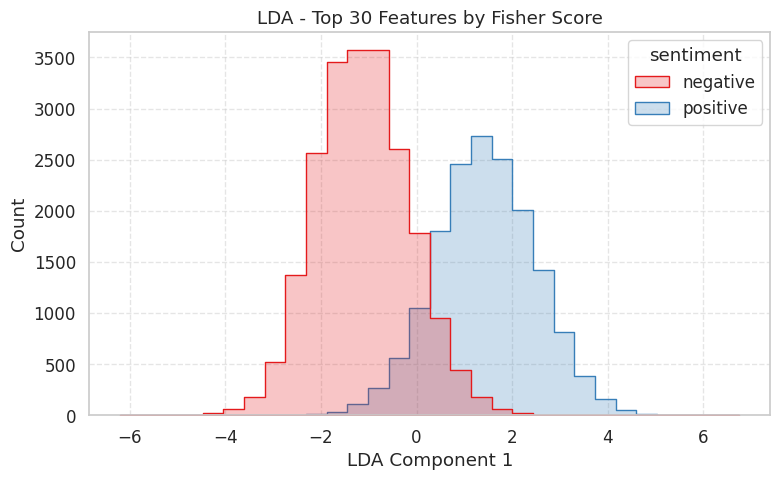

In [ ]:
# LDA projection using top 30 features selected by Fisher Score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

y_encoded = y.map({'negative': 0, 'positive': 1})
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_scaled, y_encoded)

lda_df = pd.DataFrame({'LDA1': X_lda.flatten(), 'sentiment': y.values})

plt.figure(figsize=(8, 5))
sns.histplot(data=lda_df, x='LDA1', hue='sentiment', element='step', common_norm=False, bins=30, palette='Set1')
plt.title('LDA - Top 30 Features by Fisher Score')
plt.xlabel('LDA Component 1')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## **Part 2**

##1.1 Tree


Fitting 5 folds for each of 336 candidates, totalling 1680 fits

Best Hyperparameters:
{'criterion': 'entropy', 'max_depth': np.int64(7), 'max_features': None, 'splitter': 'best'}

Validation AUC-ROC: 0.9776


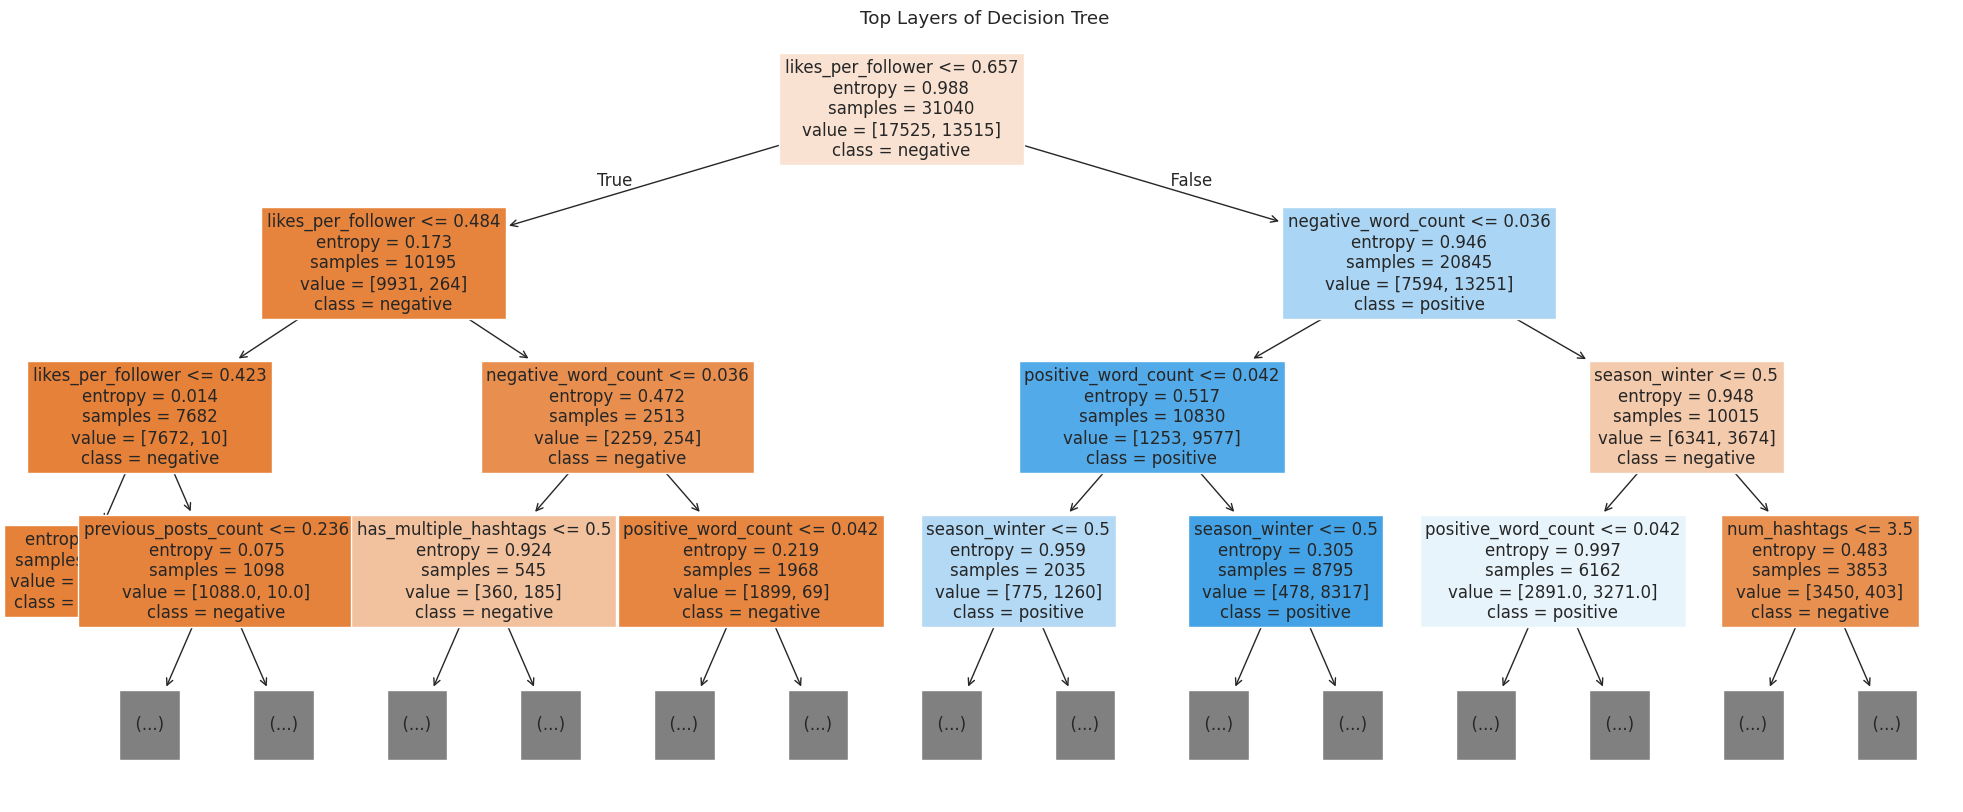

<ipython-input-22-958e40445eb7>:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.values[:15], y=feature_importances.index[:15], palette="viridis")


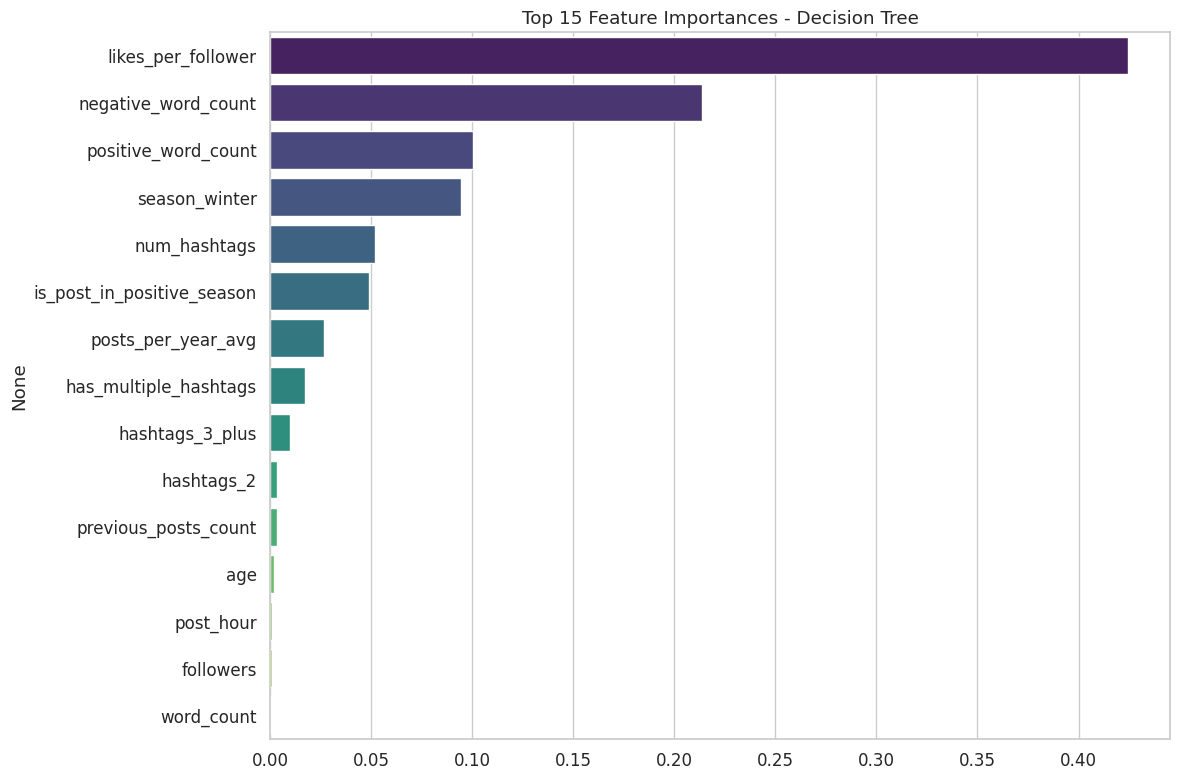

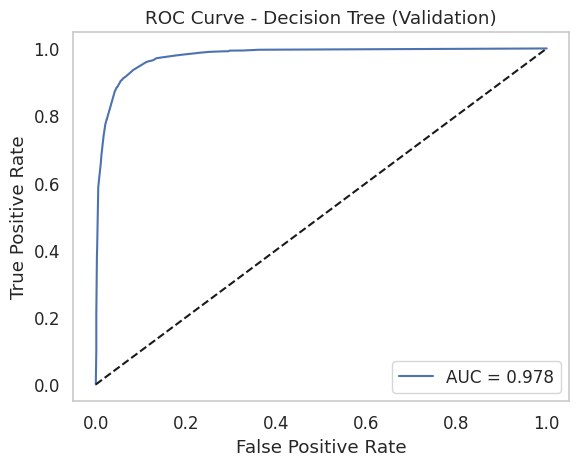

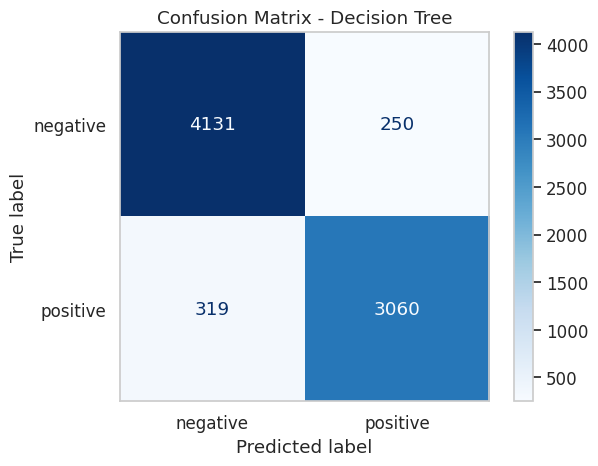

In [ ]:
##rony
# --- Import libraries ---
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# --- Prepare dataset: features and labels ---
X = df_selected[top_30_features]
y = df_selected['sentiment']

# --- Encode target labels ---
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# --- Split data into training and validation sets ---
X_train, X_val, y_train, y_val = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# --- Define cross-validation strategy ---
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

# --- Define Decision Tree model and hyperparameter grid ---
dt = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': np.arange(3, 31, 1),
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_features': [None, 'sqrt', 'log2']
}

# --- Set up GridSearchCV with AUC-ROC as scoring ---
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    scoring='roc_auc_ovr',
    cv=cv_strategy,
    n_jobs=-1,
    verbose=2,
    refit=True
)

# --- Fit the model on training data ---
grid_search.fit(X_train, y_train)

# --- Best model ---
best_model = grid_search.best_estimator_

print("\nBest Hyperparameters:")
print(grid_search.best_params_)

# --- Evaluate on validation set ---
y_val_pred_proba = best_model.predict_proba(X_val)[:, 1]
val_auc = roc_auc_score(y_val, y_val_pred_proba)
print(f"\nValidation AUC-ROC: {val_auc:.4f}")

# --- Plot Top Layers of Decision Tree ---
plt.figure(figsize=(25, 10))
plot_tree(
    best_model,
    max_depth=3,
    filled=True,
    feature_names=X.columns,
    class_names=le.classes_,
    fontsize=12
)
plt.title("Top Layers of Decision Tree")
plt.show()

# --- Feature Importances ---
feature_importances = pd.Series(best_model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances.values[:15], y=feature_importances.index[:15], palette="viridis")
plt.title("Top 15 Feature Importances - Decision Tree")
plt.tight_layout()
plt.show()

# --- ROC Curve ---
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {val_auc:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree (Validation)")
plt.legend()
plt.grid()
plt.show()

# --- Confusion Matrix ---
from sklearn.metrics import ConfusionMatrixDisplay

y_val_pred = best_model.predict(X_val)
conf_matrix = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=le.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Decision Tree")
plt.grid(False)
plt.show()


Fitting 5 folds for each of 126 candidates, totalling 630 fits
Best DT params : {'model__max_depth': np.int64(7), 'model__min_samples_leaf': 4, 'model__min_samples_split': 2}
AUC-Train      : 0.9800935316230764
AUC-Val        : 0.9776138912421399


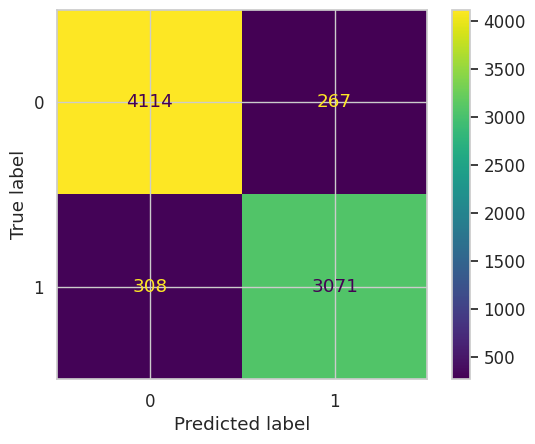

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, ConfusionMatrixDisplay


dt_pipe = Pipeline([
    ("model", DecisionTreeClassifier(random_state=42))
])


param_grid = {
    "model__max_depth"        : np.arange(3, 31, 2),
    "model__min_samples_split": [2, 4, 6],
    "model__min_samples_leaf" : [1, 2, 4]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
gs_dt = GridSearchCV(dt_pipe, param_grid,
                     scoring="roc_auc",
                     cv=cv, n_jobs=-1, verbose=1)

gs_dt.fit(X_train, y_train)
best_dt = gs_dt.best_estimator_

print("Best DT params :", gs_dt.best_params_)
print("AUC-Train      :", roc_auc_score(y_train, best_dt.predict_proba(X_train)[:,1]))
print("AUC-Val        :", roc_auc_score(y_val  , best_dt.predict_proba(X_val  )[:,1]))

# --- Confusion matrix on Validation ------------------------------------------
ConfusionMatrixDisplay.from_estimator(best_dt, X_val, y_val)


In [ ]:
# --- Top 10 Feature Importances ---
importances = best_model.feature_importances_
feat_names = X.columns
top_idx = np.argsort(importances)[::-1][:10]

print("Top-10 features:")
for i in top_idx:
    print(f"{feat_names[i]:30s} {importances[i]:.4f}")


Top-10 features:
likes_per_follower             0.4242
negative_word_count            0.2139
positive_word_count            0.1004
season_winter                  0.0946
num_hashtags                   0.0522
is_post_in_positive_season     0.0492
posts_per_year_avg             0.0268
has_multiple_hashtags          0.0172
hashtags_3_plus                0.0099
hashtags_2                     0.0033


<ipython-input-25-0b5b0450857a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances_sorted.values[:10], y=importances_sorted.index[:10], palette="Blues_d")


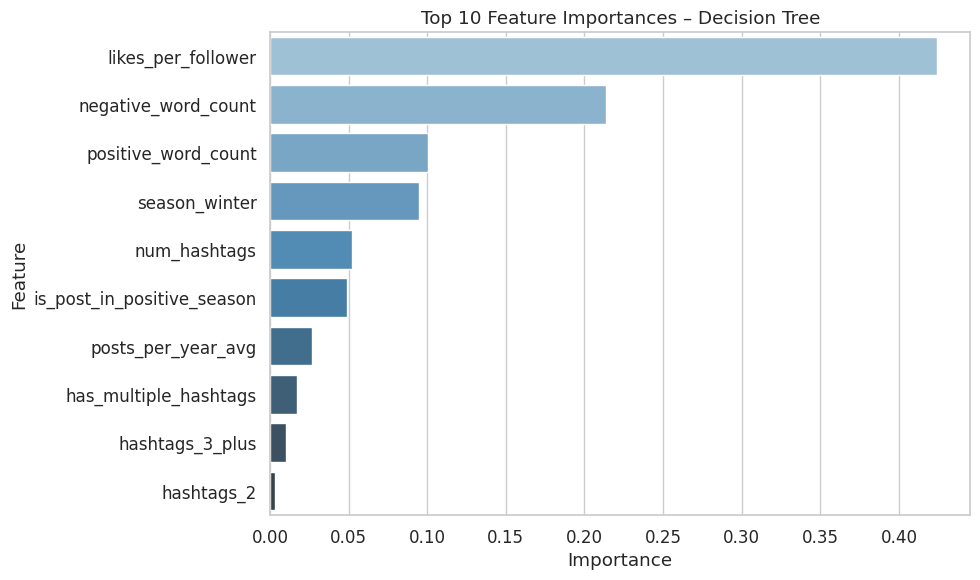

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Feature importances from Decision Tree or Random Forest
importances = pd.Series(best_model.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances_sorted.values[:10], y=importances_sorted.index[:10], palette="Blues_d")
plt.title("Top 10 Feature Importances – Decision Tree")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [ ]:
##rony
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

# --- Train a fully grown Decision Tree (no depth limit) ---
dt_full = DecisionTreeClassifier(random_state=42)
dt_full.fit(X_train, y_train)

# --- Predictions on train and validation sets ---
y_train_proba_full = dt_full.predict_proba(X_train)[:, 1]
y_val_proba_full = dt_full.predict_proba(X_val)[:, 1]

# --- Compute AUC on both sets ---
train_auc_full = roc_auc_score(y_train, y_train_proba_full)
val_auc_full = roc_auc_score(y_val, y_val_proba_full)

print(f"AUC on Training Set (full tree): {train_auc_full:.4f}")
print(f"AUC on Validation Set (full tree): {val_auc_full:.4f}")


AUC on Training Set (full tree): 0.9999
AUC on Validation Set (full tree): 0.9082


##1.2

SAPIR

In [ ]:
# --- 1. Imports ---
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- 2. Clean data (remove NaNs) ---
X_clean = X.dropna()
y_clean = y.loc[X_clean.index]

# --- 3. Encode labels ---
le = LabelEncoder()
y_encoded = le.fit_transform(y_clean)

# --- 4. Train/validation split ---
X_train, X_val, y_train, y_val = train_test_split(
    X_clean, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# --- 5. Scale features ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# --- 6. GridSearchCV with linear SVM ---
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
svc = SVC(kernel='linear', probability=False)
grid = GridSearchCV(svc, param_grid, scoring='roc_auc', cv=5, n_jobs=-1, verbose=1)
grid.fit(X_train_scaled, y_train)

# --- 7. Best model and evaluation ---
best_svm = grid.best_estimator_

y_train_pred = best_svm.predict(X_train_scaled)
y_val_pred = best_svm.predict(X_val_scaled)

train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)

print(f"Best C: {grid.best_params_['C']}")
print(f"Train Accuracy: {train_acc:.3f}")
print(f"Validation Accuracy: {val_acc:.3f}")


y_train_scores = best_svm.decision_function(X_train_scaled)
y_val_scores = best_svm.decision_function(X_val_scaled)

train_auc = roc_auc_score(y_train, y_train_scores)
val_auc = roc_auc_score(y_val, y_val_scores)

print(f"Train Accuracy: {train_acc:.3f} | AUC: {train_auc:.3f}")
print(f"Validation Accuracy: {val_acc:.3f} | AUC: {val_auc:.3f}")


# --- 8. Feature importance (weights) ---
feature_weights = pd.Series(best_svm.coef_[0], index=X_clean.columns)
feature_weights_sorted = feature_weights.sort_values(key=abs, ascending=False)

print("\nTop 10 most influential features (by absolute weight):")
print(feature_weights_sorted.head(10).round(4))

# --- 9. Plot top features ---
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_weights_sorted.abs().head(10),
            y=feature_weights_sorted.abs().head(10).index,
            palette='coolwarm')
plt.title("Top 10 Most Influential Features (SVM - Linear Kernel)")
plt.xlabel("Absolute Weight")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [ ]:

from collections import Counter

print("--- Sanity Check Before Training MLP ---\n")

# 1. Shape of data
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape  : {X_val.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape  : {y_val.shape}")

# 2. Number of features
print(f"Number of features: {X_train.shape[1]}")

# 3. Class balance
print("Class distribution in y_train:", Counter(y_train))

# 4. Check for NaNs or Infs
print("Any NaNs in X_train:", np.isnan(X_train).any())
print("Any Infs in X_train:", np.isinf(X_train).any())

# 5. scikit-learn version
import sklearn
print("scikit-learn version:", sklearn.__version__)

# 6. Check dtype
print("X_train dtypes:\n", X_train.dtypes)

print("\n--- Done ---")


from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import time

# --- 1. Drop rows with NaNs ---
X_clean = X.dropna()
y_clean = y.loc[X_clean.index]

# --- 2. Split ---
X_train, X_val, y_train, y_val = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# --- 3. Scale ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# --- 4. Train single model ---
print("Training model with hidden_layer_sizes=(10,10)")
start_time = time.time()

model = MLPClassifier(hidden_layer_sizes=(10, 10),
                      activation='tanh',
                      max_iter=300,
                      learning_rate_init=0.001,
                      alpha=0.0,
                      random_state=42,
                      verbose=True)

model.fit(X_train_scaled, y_train)

end_time = time.time()
print(f"Training time: {end_time - start_time:.2f} seconds")

# --- 5. Evaluate ---
train_acc = model.score(X_train_scaled, y_train)
val_acc = model.score(X_val_scaled, y_val)

print(f"Train Accuracy: {train_acc:.3f}")
print(f"Validation Accuracy: {val_acc:.3f}")



from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# --- 1. Lists to store results ---
train_accs = []
val_accs = []
sizes = range(1, 50, 2)  # test hidden layers with 1 to 49 neurons (step=2)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# --- 2. Run for each size ---
for size_ in sizes:
    print(f"Testing hidden_layer_sizes=({size_},{size_})")

    model = MLPClassifier(hidden_layer_sizes=(size_, size_),
                          activation='tanh',
                          max_iter=1000,
                          learning_rate_init=0.001,
                          alpha=0.0,
                          random_state=42,
                          verbose=False)

    # Train
    model.fit(X_train_scaled, y_train)

    # Evaluate
    train_acc = model.score(X_train_scaled, y_train)
    val_acc = model.score(X_val_scaled, y_val)

    train_accs.append(train_acc)
    val_accs.append(val_acc)

# --- 3. Plot results ---
plt.figure(figsize=(10, 6))
plt.plot(sizes, train_accs, label='Train Accuracy', marker='o')
plt.plot(sizes, val_accs, label='Validation Accuracy', marker='s')
plt.xlabel('Neurons per Hidden Layer')
plt.ylabel('Accuracy')
plt.title('MLP Accuracy vs. Hidden Layer Size (2 Layers)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# --- טווח איטרציות ---
max_iteration = np.arange(100, 3000, 200)

# --- רשימות תוצאות ---
train_accs_iter = []
val_accs_iter = []

for iter_ in max_iteration:
    model = MLPClassifier(hidden_layer_sizes=(30, 30),
                          activation='tanh',
                          max_iter=iter_,
                          learning_rate_init=0.001,
                          alpha=0.0,
                          random_state=42,
                          verbose=False)

    model.fit(X_train_scaled, y_train)
    train_accs_iter.append(model.score(X_train_scaled, y_train))
    val_accs_iter.append(model.score(X_val_scaled, y_val))

# --- שרטוט גרף ---
plt.figure(figsize=(15, 4))
plt.plot(max_iteration, train_accs_iter, label='Train Accuracy', marker='o')
plt.plot(max_iteration, val_accs_iter, label='Validation Accuracy', marker='s')
plt.xlabel('Max Iterations')
plt.ylabel('Accuracy')
plt.title('Tuning the Number of Iterations in MLP')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# --- 1. Import libraries ---
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Input

# --- 2. Clean data and define features ---
print("Checking for NaNs:", df_selected.isnull().sum().sum())
df_selected = df_selected.dropna()

X = df_selected[top_30_features].astype('float32')  # Use top_9_features if needed
y = df_selected['sentiment']

# --- 3. Encode labels to binary ---
le = LabelEncoder()
y_binary = le.fit_transform(y)  # 0 = negative, 1 = positive

# --- 4. Train-test split (stratified) ---
X_train, X_val, y_train, y_val = train_test_split(
    X, y_binary, test_size=0.2, stratify=y_binary, random_state=123
)

# --- 5. Feature scaling ---
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# --- 6. Define MLP model ---
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Single output for binary classification

# --- 7. Compile model ---
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# --- 8. Train model ---
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=30,
                    batch_size=32,
                    verbose=1)

# --- 9. Evaluate model ---
val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
print(f"Validation Accuracy (evaluate): {val_acc:.4f}")

# --- 10. Predictions ---
val_pred_proba = model.predict(X_val).flatten()
train_pred_proba = model.predict(X_train).flatten()

val_pred = (val_pred_proba >= 0.5).astype(int)
train_pred = (train_pred_proba >= 0.5).astype(int)

# --- 11. AUC-ROC ---
val_auc = roc_auc_score(y_val, val_pred_proba)
train_auc = roc_auc_score(y_train, train_pred_proba)

print(f"AUC-ROC on Training Set: {train_auc:.4f}")
print(f"AUC-ROC on Validation Set: {val_auc:.4f}")

# --- 12. Classification report ---
print("\nClassification Report on Validation Set:")
print(classification_report(y_val, val_pred, target_names=le.classes_))

# --- 13. Confusion matrix ---
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_val, val_pred), annot=True, fmt='d',
            xticklabels=le.classes_, yticklabels=le.classes_, cmap="YlGnBu")
plt.title("Confusion Matrix - MLP")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

# --- 14. ROC Curve ---
fpr, tpr, _ = roc_curve(y_val, val_pred_proba)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {val_auc:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - MLP")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# --- 15. Training accuracy & loss plots ---
plt.figure(figsize=(14, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


##1.3 SVM

גרסא קטנה


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np

# --- 1. Clean Data (subset) ---
df_clean = df_selected[top_30_features + ['sentiment']].dropna()
df_sample = df_clean.sample(n=3000, random_state=42)  # דגימה קטנה לבדיקה מהירה

X = df_sample[top_30_features].astype('float32')
y = df_sample['sentiment']
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# --- 2. Split & Scale ---
X_train, X_val, y_train, y_val = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# --- 3. Train SVM ---
model = SVC(kernel='linear', C=1, probability=True, random_state=42)
model.fit(X_train_scaled, y_train)

# --- 4. Evaluation ---
y_val_proba = model.predict_proba(X_val_scaled)[:, 1]
y_val_pred = model.predict(X_val_scaled)

print("AUC-ROC:", roc_auc_score(y_val, y_val_proba))
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred, target_names=le.classes_))


חדש

In [ ]:

from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# --- 1. Features & Labels ---
df_clean = df_selected[top_30_features + ['sentiment']].dropna()
X = df_clean[top_30_features].astype('float32')
y = df_clean['sentiment']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

# --- 2. Split & Scale ---
X_train, X_val, y_train, y_val = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# --- 3. Train Linear SVM ---
model = SVC(kernel='linear', C=1, probability=True, random_state=42)
model.fit(X_train_scaled, y_train)

# --- 4. Evaluation ---
y_val_proba = model.predict_proba(X_val_scaled)[:, 1]
y_val_pred = model.predict(X_val_scaled)

print("AUC-ROC:", roc_auc_score(y_val, y_val_proba))
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred, target_names=le.classes_))


In [ ]:
# --- 1. Imports ---
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# --- 2. Select features and target ---
X = df_selected[top_30_features].dropna().astype('float32')
y = df_selected['sentiment']

# --- 3. Encode target (positive/negative) ---
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# --- 4. Split data and scale ---
X_train, X_val, y_train, y_val = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# --- 5. GridSearchCV to tune C ---
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
svc = SVC(kernel='linear', probability=True)
grid = GridSearchCV(svc, param_grid, scoring='roc_auc', cv=5, verbose=1, n_jobs=-1)
grid.fit(X_train_scaled, y_train)

print(f"Best C: {grid.best_params_['C']}")
best_svm = grid.best_estimator_

# --- 6. Predictions and evaluation ---
y_val_proba = best_svm.predict_proba(X_val_scaled)[:, 1]
y_val_pred = best_svm.predict(X_val_scaled)

auc_val = roc_auc_score(y_val, y_val_proba)
print(f"AUC-ROC on Validation: {auc_val:.4f}")

print("\nClassification Report:")
print(classification_report(y_val, y_val_pred, target_names=le.classes_))

# --- 7. Confusion matrix ---
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_val, y_val_pred),
            annot=True, fmt='d',
            xticklabels=le.classes_,
            yticklabels=le.classes_,
            cmap="YlGnBu")
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

# --- 8. ROC curve ---
fpr, tpr, _ = roc_curve(y_val, y_val_proba)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc_val:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM (Linear)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 9. Feature importance (weights of linear SVM) ---
coef_series = pd.Series(best_svm.coef_[0], index=X.columns)
coef_sorted = coef_series.sort_values(key=abs, ascending=False)
print("\nTop 10 Most Influential Features (by absolute weight):")
print(coef_sorted.head(10).round(4))

# --- 10. Bar plot of top features ---
plt.figure(figsize=(10, 6))
sns.barplot(x=coef_sorted.abs().head(10), y=coef_sorted.abs().head(10).index, palette="coolwarm")
plt.title("Top 10 Most Influential Features (SVM - Linear Kernel)")
plt.xlabel("Absolute Weight")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [ ]:
##לא עובד
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Prepare data
X = df_selected[top_30_features].dropna().astype('float32')
y = df_selected['sentiment']
le = LabelEncoder()
y_bin = le.fit_transform(y)

# 2. Split and scale
X_train, X_val, y_train, y_val = train_test_split(
    X, y_bin, test_size=0.2, stratify=y_bin, random_state=123
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# 3. Grid search for C
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
svm = SVC(kernel='linear', probability=True)
grid = GridSearchCV(svm, param_grid, scoring='roc_auc', cv=5, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

# 4. Evaluation
best_svm = grid.best_estimator_
print("Best C:", grid.best_params_['C'])

y_val_proba = best_svm.predict_proba(X_val)[:, 1]
y_val_pred = best_svm.predict(X_val)

val_auc = roc_auc_score(y_val, y_val_proba)
print(f"AUC-ROC on Validation: {val_auc:.4f}")

print("\nClassification Report:")
print(classification_report(y_val, y_val_pred, target_names=le.classes_))

# Confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True, fmt='d',
            xticklabels=le.classes_, yticklabels=le.classes_, cmap="Oranges")
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_val, y_val_proba)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {val_auc:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
coef_df = pd.Series(best_svm.coef_[0], index=X.columns)
coef_df = coef_df.sort_values(key=abs, ascending=False)
print("Top features by weight (absolute value):")
print(coef_df.head(10))


##1.4 clustering

In [ ]:
# --- 1. Imports ---
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# --- 2. Select features ---
clustering_features = ['likes_per_follower', 'positive_word_count',
                       'negative_word_count', 'word_count',
                       'posts_per_year_avg', 'num_hashtags']

df_cluster = df_selected[clustering_features + ['sentiment']].dropna().copy()

# --- 3. Normalize the data ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster[clustering_features])

# --- 4. Run KMeans clustering with K=2 ---
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(X_scaled)
df_cluster['cluster'] = clusters

# --- 5. Evaluate cluster quality ---
sil_score = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {sil_score:.3f}")

# --- 6. Cross-tab sentiment vs cluster ---
print("Cluster distribution by sentiment:")
print(pd.crosstab(df_cluster['cluster'], df_cluster['sentiment'], normalize='index').round(2))

# --- 7. Cluster-wise feature means ---
print("\nCluster feature averages:")
print(df_cluster.groupby('cluster')[clustering_features].mean().round(2))

# --- 8. Visualize PCA projection (2D) ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_cluster['cluster'], palette='Set2')
plt.title("KMeans Clustering (K=2) - PCA Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 9. Pie chart: cluster distribution ---
df_cluster['cluster'].value_counts(normalize=True).plot.pie(
    autopct='%1.1f%%', labels=['Cluster 0', 'Cluster 1'],
    ylabel='', title='Cluster Proportions')
plt.tight_layout()
plt.show()

# --- 10. 3D PCA Visualization (optional) ---
from mpl_toolkits.mplot3d import Axes3D

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=df_cluster['cluster'], cmap='Set2')
ax.set_title("KMeans Clustering (K=2) - 3D PCA Projection")
plt.tight_layout()
plt.show()


In [ ]:
# --- 1. Import libraries ---
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# --- 2. Select features for clustering ---
clustering_features = ['likes_per_follower', 'positive_word_count',
                       'negative_word_count', 'word_count',
                       'posts_per_year_avg', 'num_hashtags']

df_cluster = df_selected[clustering_features + ['sentiment']].dropna().copy()

# --- 3. Standardize the features ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster[clustering_features])

# --- 4. Run KMeans with K=2 ---
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(X_scaled)

# --- 5. Add cluster assignments back to the DataFrame ---
df_cluster['cluster'] = clusters

# --- 6. Visualize clustering using PCA (2D projection) ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette="Set2")
plt.title("KMeans Clustering (K=2) - PCA Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 7. Evaluate clustering against sentiment labels ---
print("Cluster distribution by sentiment:\n")
print(pd.crosstab(df_cluster['cluster'], df_cluster['sentiment'], normalize='index').round(2))


In [ ]:
pd.crosstab(df_cluster['cluster'], df_cluster['sentiment'], normalize='index').round(2)



**מידע כללי שהצאט ביקש**

In [ ]:
# --- 1. BASIC INFO -----------------------------------------------------------
import pandas as pd, numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from pathlib import Path

# df_selected: מניח שהיא כבר בזיכרון
TARGET = 'sentiment'                 # התאימי אם שם העמודה שונה
feature_cols = df_selected.columns.drop(TARGET)

# גודל הדאטה והתפלגות תגיות
print(f"Total samples    : {len(df_selected):,}")
print("Class counts     :\n", df_selected[TARGET].value_counts())

# הצפנת התגית (אם עוד לא עשית)
le = LabelEncoder()
y = le.fit_transform(df_selected[TARGET])
X = df_selected[feature_cols]

# --- 2. TRAIN / VAL / TEST SPLIT ---------------------------------------------
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42)

print({ "Train": len(X_train), "Val": len(X_val), "Test": len(X_test) })

# --- 3. PRE-PROCESSING PIPELINE  (ללא Data-Leakage) --------------------------
numeric_features      = X.select_dtypes(include=["int64","float64"]).columns
categorical_features  = X.select_dtypes(
                            include=["object","category","bool"]).columns

preprocess = ColumnTransformer([
    ("num", StandardScaler(), numeric_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])


In [ ]:
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

train_auc, val_auc = [], []

for size in range(1, 50, 2):
    mlp = Pipeline([
        ("prep", preprocess),
        ("model", MLPClassifier(random_state=1,
                                hidden_layer_sizes=(size, size),
                                max_iter=1000, activation="tanh",
                                learning_rate_init=0.001, alpha=0.0,
                                verbose=False))
    ])
    mlp.fit(X_train, y_train)
    train_auc.append(roc_auc_score(y_train, mlp.predict_proba(X_train)[:,1]))
    val_auc  .append(roc_auc_score(y_val  , mlp.predict_proba(X_val  )[:,1]))

plt.figure(figsize=(12,4))
plt.plot(range(1,50,2), train_auc, label="Train")
plt.plot(range(1,50,2), val_auc  , label="Val")
plt.xlabel("# neurons per layer"); plt.ylabel("AUC"); plt.legend()
plt.title("Tuning number of neurons in 2-layer MLP")
plt.show()


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline       # <<< הוספה

from sklearn.calibration import CalibratedClassifierCV

svm_pipe = Pipeline([
    ("prep", preprocess),
    ("model", LinearSVC(C=1.0, class_weight="balanced", random_state=42))
])

cal_svm = CalibratedClassifierCV(svm_pipe, method="sigmoid", cv=cv)
cal_svm.fit(X_train, y_train)

print("AUC-Train:", roc_auc_score(y_train, cal_svm.predict_proba(X_train)[:,1]))
print("AUC-Val  :", roc_auc_score(y_val  , cal_svm.predict_proba(X_val  )[:,1]))

# TOP-5 weights (חשוב כש-X הוא sparse בגלל OneHot)
coef = cal_svm.base_estimator.named_steps["model"].coef_.ravel()
names = cal_svm.base_estimator.named_steps["prep"].get_feature_names_out()
top5  = np.argsort(np.abs(coef))[::-1][:5]
print("Top-5 weights:")
for i in top5:
    print(f"{names[i]:30s} {coef[i]:+.3f}")


In [ ]:
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score, davies_bouldin_score

# משתמשים ב-StandardScaler בלבד (ללא One-Hot) כדי לא לנפח המרחב
from sklearn.preprocessing import StandardScaler
X_num_scaled = StandardScaler().fit_transform(
                  df_selected[numeric_features])   # רק פיצ'רים מספריים

for k in [2,3,4,5]:
    kmed = KMedoids(n_clusters=k, random_state=42).fit(X_num_scaled)
    labels = kmed.labels_
    sil = silhouette_score(X_num_scaled, labels)
    db  = davies_bouldin_score(X_num_scaled, labels)
    print(f"K={k} | Silhouette={sil:.3f} | Davies-Bouldin={db:.3f}")


המשך
- ספיר

In [ ]:


pip install scikit-learn scikit-learn-extra
# --- Imports ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA

from sklearn_extra.cluster import KMedoids

# --- Step 1: Select features for clustering ---
clustering_features = ['likes_per_follower', 'positive_word_count',
                       'negative_word_count', 'word_count',
                       'posts_per_year_avg', 'num_hashtags']

df_cluster = df_selected[clustering_features + ['sentiment']].dropna().copy()

# --- Step 2: Normalize features ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster[clustering_features])

# --- Step 3: Evaluate K values ---
silhouette_scores = []
db_scores = []
k_values = range(2, 7)
cluster_labels = {}

for k in k_values:
    kmedoids = KMedoids(n_clusters=k, random_state=42, metric='euclidean')
    labels = kmedoids.fit_predict(X_scaled)
    cluster_labels[k] = labels
    silhouette_scores.append(silhouette_score(X_scaled, labels))
    db_scores.append(davies_bouldin_score(X_scaled, labels))

# --- Step 4: Plot silhouette & DB scores ---
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.lineplot(x=list(k_values), y=silhouette_scores, marker='o')
plt.title("Silhouette Score by K")
plt.xlabel("K")
plt.ylabel("Silhouette Score")

plt.subplot(1, 2, 2)
sns.lineplot(x=list(k_values), y=db_scores, marker='o')
plt.title("Davies-Bouldin Score by K")
plt.xlabel("K")
plt.ylabel("DB Score")

plt.tight_layout()
plt.show()

# --- Step 5: Final clustering with K=2 ---
best_k = 2  # or set based on best silhouette/DB score
final_kmedoids = KMedoids(n_clusters=best_k, random_state=42, metric='euclidean')
df_cluster['cluster'] = final_kmedoids.fit_predict(X_scaled)

# --- Step 6: PCA projection for visualization ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_cluster['cluster'], palette='Set2')
plt.title(f"K-Medoids Clustering (K={best_k}) - PCA Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Step 7: Cluster vs. sentiment ---
print("Cluster distribution by sentiment:")
print(pd.crosstab(df_cluster['cluster'], df_cluster['sentiment'], normalize='index').round(2))

# --- Step 8: Cluster-wise feature means ---
print("\nCluster feature averages:")
print(df_cluster.groupby('cluster')[clustering_features].mean().round(2))
